In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import xarray as xr

from mapper_functions import plot_global
from mapper_functions import plot_na

from my_functions import read_obsfcstana_pentads


In [2]:
OFA_2015 = np.load('../test_data/OFA_2015_noscaled.npz')
OFA_2016 = np.load('../test_data//OFA_2016_noscaled.npz')
OFA_2017 = np.load('../test_data/OFA_2017_noscaled.npz')

obs_lat_15 = OFA_2015['obs_lat_15']
obs_lat_16 = OFA_2016['obs_lat_16']
obs_lat_17 = OFA_2017['obs_lat_17']
obs_lat = np.concatenate([obs_lat_15, obs_lat_16, obs_lat_17])

obs_lon_15 = OFA_2015['obs_lon_15']
obs_lon_16 = OFA_2016['obs_lon_16']
obs_lon_17 = OFA_2017['obs_lon_17']
obs_lon = np.concatenate([obs_lon_15, obs_lon_16, obs_lon_17])

obs_obs_15 = OFA_2015['obs_obs_15']
obs_obs_16 = OFA_2016['obs_obs_16']
obs_obs_17 = OFA_2017['obs_obs_17']
obs_obs = np.concatenate([obs_obs_15, obs_obs_16, obs_obs_17])

obs_fcst_15 = OFA_2015['obs_fcst_15']
obs_fcst_16 = OFA_2016['obs_fcst_16']
obs_fcst_17 = OFA_2017['obs_fcst_17']
obs_fcst = np.concatenate([obs_fcst_15, obs_fcst_16, obs_fcst_17])

obs_obsvar_15 = OFA_2015['obs_obsvar_15']
obs_obsvar_16 = OFA_2016['obs_obsvar_16']
obs_obsvar_17 = OFA_2017['obs_obsvar_17']
obs_obsvar = np.concatenate([obs_obsvar_15, obs_obsvar_16, obs_obsvar_17])

pentad2_15 = OFA_2015['pentad2_15']
pentad2_16 = OFA_2016['pentad2_16']
pentad2_17 = OFA_2017['pentad2_17']
pentad2 = np.concatenate([pentad2_15, pentad2_16, pentad2_17])


# Load scaled obs
OFA_2015 = np.load('../test_data/OFA_2015_scaled_v3.npz')
OFA_2016 = np.load('../test_data/OFA_2016_scaled_v3.npz')
# OFA_2017 = np.load('../test_data/OFA_2017_scaled_v2.npz')

obs_lat_15 = OFA_2015['obs_lat_15']
obs_lat_16 = OFA_2016['obs_lat_16']
obs_lat_17 = OFA_2017['obs_lat_17']
obs_lat_s = np.concatenate([obs_lat_15, obs_lat_16]) # , obs_lat_17])

obs_lon_15 = OFA_2015['obs_lon_15']
obs_lon_16 = OFA_2016['obs_lon_16']
obs_lon_17 = OFA_2017['obs_lon_17']
obs_lon_s = np.concatenate([obs_lon_15, obs_lon_16]) #, obs_lon_17])

obs_obs_15 = OFA_2015['obs_obs_15']
obs_obs_16 = OFA_2016['obs_obs_16']
obs_obs_17 = OFA_2017['obs_obs_17']
obs_obs_s = np.concatenate([obs_obs_15, obs_obs_16]) #, obs_obs_17])

obs_fcst_15 = OFA_2015['obs_fcst_15']
obs_fcst_16 = OFA_2016['obs_fcst_16']
obs_fcst_17 = OFA_2017['obs_fcst_17']
obs_fcst_s = np.concatenate([obs_fcst_15, obs_fcst_16]) #, obs_fcst_17])

obs_obsvar_15 = OFA_2015['obs_obsvar_15']
obs_obsvar_16 = OFA_2016['obs_obsvar_16']
obs_obsvar_17 = OFA_2017['obs_obsvar_17']
obs_obsvar_s = np.concatenate([obs_obsvar_15, obs_obsvar_16]) #, obs_obsvar_17])

pentad2_15 = OFA_2015['pentad2_15']
pentad2_16 = OFA_2016['pentad2_16']
pentad2_17 = OFA_2017['pentad2_17']
pentad2_s = np.concatenate([pentad2_15, pentad2_16]) #, pentad2_17])

In [3]:
vector1 = obs_lat*obs_lon*pentad2

vector2 = obs_lat_s*obs_lon_s*pentad2_s

common_values = np.intersect1d(vector1, vector2, assume_unique=True)
matched_indices = np.where(np.isin(vector1, common_values))[0]
matched_indices2 = np.where(np.isin(vector2, common_values))[0]

print(len(common_values), len(obs_lat), len(obs_lat_s))

11985737 34362840 20732462


In [ ]:
# # Larger array (m x 3)
# larger_array = np.column_stack((obs_lat, obs_lon))

# # Smaller array (n x 3)
# smaller_array = np.column_stack((obs_lat_s, obs_lon_s))

# # Compare rows using broadcasting
# match_rows = np.all(np.isin(larger_array, smaller_array), axis=1)
# # Find indices of matched rows
# matched_indices = np.where(match_rows)[0]

# len(obs_lat), len(obs_lat_s), len(matched_indices)# Check for row-wise matches between large_array and smaller_array
# # Compare rows using broadcasting
# match_rows2 = np.all(np.isin(smaller_array, larger_array), axis=1)
# # Find indices of matched rows
# matched_indices2 = np.where(match_rows2)[0]

# len(obs_lat), len(obs_lat_s), len(matched_indices2)

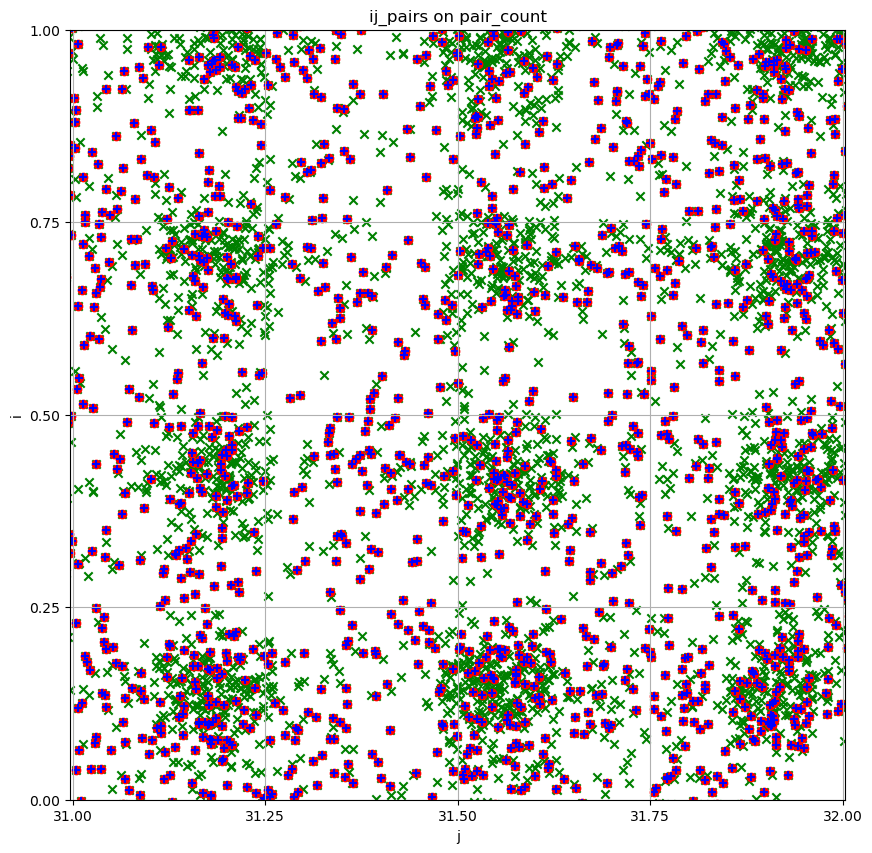

In [4]:
fig, axs = plt.subplots(figsize=(10, 10))

# Plot the ij_pairs on top of the pair_count array
plt.scatter(obs_lon, obs_lat, color='green', marker='x')
plt.scatter(obs_lon[matched_indices], obs_lat[matched_indices], color='red', marker='o')
plt.scatter(obs_lon_s[matched_indices2], obs_lat_s[matched_indices2], color='blue', marker='+')


plt.xlabel('j')
plt.ylabel('i')
plt.title('ij_pairs on pair_count')
plt.grid(True)

# Force the axis to be square
plt.axis('equal')

# Set the x-axis and y-axis limits
plt.xlim(31, 32)  # Adjust the limits as needed
plt.ylim(0, 1)  # Adjust the limits as needed

# Set the x-axis and y-axis ticks with 0.25 spacing
plt.xticks(np.arange(31, 32.25, 0.25))
plt.yticks(np.arange(0, 1.25, 0.25))

# Show the plot
plt.show()

In [5]:
# Subsetting but keeping names

obs_lat = obs_lat[matched_indices]
obs_lon = obs_lon[matched_indices]
obs_obs = obs_obs[matched_indices]
obs_fcst = obs_fcst[matched_indices]

obs_lat_s = obs_lat_s[matched_indices2]
obs_lon_s = obs_lon_s[matched_indices2]
obs_obs_s = obs_obs_s[matched_indices2]
obs_fcst_s = obs_fcst_s[matched_indices2]

In [6]:
# Open the netCDF file using xarray
# ds = xr.open_dataset('/discover/nobackup/amfox/Experiments/ASCAT_3Y_v2/ASCAT_M36/output/SMAP_EASEv2_M36_GLOBAL/stats/z_score_clim_v2/combined_all_pentads_M36_zscore_stats_2015_doy152_2017_doy365_hscale_0.00.nc4')
# ds = xr.open_dataset('../test_data/combined_all_pentads_M36_zscore_stats_2015_doy152_2017_doy365_hscale_0.00.nc4')
ds = xr.open_dataset('../test_data/combined_all_pentads_M36_zscore_stats_2015_doy182_2017_doy181_W_75d_Nmin_5_AD.nc4')


sclprm_mean_obs_3D = ds['o_mean'].values
sclprm_mean_mod_3D = ds['m_mean'].values
sclprm_std_obs_3D = ds['o_std'].values
sclprm_std_mod_3D = ds['m_std'].values

In [7]:
#Calculate i,j
ll_lon = -180.0
ll_lat = -90.0
dlon = 0.25
dlat = 0.25

In [8]:
import math


In [9]:

n_obs = len(obs_obs)
i_out = np.zeros(n_obs)
j_out = np.zeros(n_obs)

tmp_obs = obs_obs.copy()
tmp_std_obs = obs_obsvar.copy()

for i in range(len(obs_obs)):
    this_lon = obs_lon[i]   
    this_lat = obs_lat[i]  
    i_ind = math.ceil((this_lon - ll_lon)/dlon) - 1 # Subtract one for zero indexing
    j_ind = math.ceil((this_lat - ll_lat)/dlat) - 1 # Subtract one for zero indexing

    i_out[i] = i_ind
    j_out[i] = j_ind

    sclprm_mean_obs = sclprm_mean_obs_3D[int(pentad2[i]-1), :, :]
    sclprm_mean_mod = sclprm_mean_mod_3D[int(pentad2[i]-1), :, :]
    sclprm_std_obs = sclprm_std_obs_3D[int(pentad2[i]-1), :, :]
    sclprm_std_mod = sclprm_std_mod_3D[int(pentad2[i]-1), :, :]

    if (sclprm_mean_obs[i_ind, j_ind] > 0 and sclprm_mean_mod[i_ind, j_ind] > 0 and
    sclprm_std_obs[i_ind, j_ind] >= 0 and sclprm_std_mod[i_ind, j_ind] >= 0):
        # Scale via standard normal deviates
        tmpreal = sclprm_std_mod[i_ind, j_ind] / sclprm_std_obs[i_ind, j_ind]
        tmp_obs[i] = sclprm_mean_mod[i_ind, j_ind] + tmpreal * (tmp_obs[i] - sclprm_mean_obs[i_ind, j_ind])
        # Scale observation error std
        tmp_std_obs[i] = tmpreal * tmp_std_obs[i]

     #   i_out[i] = i_ind
     #   j_out[i] = j_ind
        
    else:
        tmp_obs[i] = -9999.9

idx = np.where(tmp_obs >= -9999)

In [10]:
ii = math.ceil((-179.9 - ll_lon)/dlon) - 1 

sclprm_mean_obs.shape, np.max(i_out), np.max(j_out), ii, sclprm_mean_obs[ii,0]

((1440, 720), 1435.0, 679.0, 0, nan)

In [11]:
indices_i = i_out.astype(int)
indices_j = j_out.astype(int)
observations = obs_obs

# pair_count = np.zeros((indices_i.max()+1, indices_j.max()+1))
pair_count = np.zeros((1440, 720))

observations_by_pair = {}

for i, j, obs in zip(indices_i, indices_j, observations):
    if i != 0 or j != 0:
        if (i, j) in observations_by_pair:
            observations_by_pair[(i, j)].append(obs)
        else:
            observations_by_pair[(i, j)] = [obs]

        pair_count[int(i), int(j)] += 1

In [12]:
n_obs = len(obs_obs_s)
i_out = np.zeros(n_obs)
j_out = np.zeros(n_obs)

for i in range(len(obs_obs_s)):
    this_lon = obs_lon_s[i]   
    this_lat = obs_lat_s[i]  
    i_out[i] = math.ceil((this_lon - ll_lon)/dlon) - 1 #
    j_out[i] = math.ceil((this_lat - ll_lat)/dlat) - 1 #

In [13]:
indices_i_s = i_out.astype(int)
indices_j_s = j_out.astype(int)
observations = obs_obs_s

# pair_count = np.zeros((indices_i.max()+1, indices_j.max()+1))
pair_count_s = np.zeros((1440, 720))

observations_by_pair_s = {}

for i, j, obs in zip(indices_i, indices_j, observations):
    if i != 0 or j != 0:
        if (i, j) in observations_by_pair_s:
            observations_by_pair_s[(i, j)].append(obs)
        else:
            observations_by_pair_s[(i, j)] = [obs]

        pair_count_s[int(i), int(j)] += 1

In [14]:
# Get indices of the top 10 pairs with the most counts
n_top_pairs = 60
flat_counts = pair_count_s.flatten()
top_indices = np.argpartition(flat_counts, -n_top_pairs)[-n_top_pairs:]
top_pairs = np.unravel_index(top_indices, pair_count_s.shape)

# Print the top 10 pairs and their counts
for i, j in zip(top_pairs[0], top_pairs[1]):
    count = pair_count[i, j]
    print(f"Pair ({i}, {j}) has {count} observations.")

Pair (738, 535) has 271.0 observations.
Pair (839, 329) has 272.0 observations.
Pair (944, 479) has 272.0 observations.
Pair (434, 237) has 271.0 observations.
Pair (718, 573) has 271.0 observations.
Pair (762, 469) has 272.0 observations.
Pair (446, 266) has 272.0 observations.
Pair (762, 500) has 273.0 observations.
Pair (746, 493) has 277.0 observations.
Pair (737, 535) has 274.0 observations.
Pair (729, 562) has 273.0 observations.
Pair (487, 207) has 276.0 observations.
Pair (440, 267) has 275.0 observations.
Pair (950, 502) has 278.0 observations.
Pair (925, 497) has 273.0 observations.
Pair (846, 247) has 275.0 observations.
Pair (440, 258) has 274.0 observations.
Pair (835, 235) has 275.0 observations.
Pair (719, 478) has 278.0 observations.
Pair (1197, 278) has 274.0 observations.
Pair (761, 434) has 279.0 observations.
Pair (1181, 238) has 274.0 observations.
Pair (713, 481) has 279.0 observations.
Pair (949, 502) has 324.0 observations.
Pair (453, 304) has 344.0 observations

In [15]:
ij_pairs = []  # Initialize the ij_pairs list

for i, j in zip(top_pairs[0], top_pairs[1]):
    ij_pairs.append((int(i), int(j)))

print(ij_pairs)

pair_indices = {}  # Dictionary to store indices for each pair
pair_indices_s = {}  # Dictionary to store indices for each pair

# Loop over pairs and create subplots
for pair in ij_pairs:
    find_pair_indices = []
    find_pair_indices_s = []

    for idx, (ii, jj) in enumerate(zip(indices_i, indices_j)):
        if ii == pair[0] and jj == pair[1]:
            find_pair_indices.append(idx)
    pair_indices[pair] = find_pair_indices  # Save indices for the current pair

    for idx, (ii, jj) in enumerate(zip(indices_i_s, indices_j_s)):
        if ii == pair[0] and jj == pair[1]:
            find_pair_indices_s.append(idx)
    pair_indices_s[pair] = find_pair_indices_s  # Save indices for the current pair    

    # Rest of the code for plotting goes here


[(738, 535), (839, 329), (944, 479), (434, 237), (718, 573), (762, 469), (446, 266), (762, 500), (746, 493), (737, 535), (729, 562), (487, 207), (440, 267), (950, 502), (925, 497), (846, 247), (440, 258), (835, 235), (719, 478), (1197, 278), (761, 434), (1181, 238), (713, 481), (949, 502), (453, 304), (1196, 278), (445, 270), (440, 281), (876, 452), (835, 262), (1176, 252), (1206, 282), (826, 324), (440, 257), (478, 226), (801, 223), (1178, 247), (762, 434), (440, 271), (959, 492), (832, 321), (828, 327), (936, 472), (814, 230), (728, 562), (832, 302), (1198, 278), (458, 309), (1185, 221), (824, 326), (1179, 245), (839, 236), (454, 274), (454, 276), (917, 500), (833, 235), (835, 232), (1179, 271), (1182, 236), (1192, 221)]


In [16]:

import pickle

# File path to save the dictionary
file_path = 'pair_indices.pkl'

# Save the dictionary to disk
with open(file_path, 'wb') as file:
    pickle.dump(pair_indices, file)

# File path to save the dictionary
file_path = 'pair_indices_s.pkl'

# Save the dictionary to disk
with open(file_path, 'wb') as file:
    pickle.dump(pair_indices_s, file)   


In [17]:
import pickle

# File path of the saved dictionary
file_path = 'pair_indices.pkl'

# Load the dictionary from disk
with open(file_path, 'rb') as file:
    pair_indices = pickle.load(file)

# File path of the saved dictionary
file_path = 'pair_indices_s.pkl'

# Load the dictionary from disk
with open(file_path, 'rb') as file:
    pair_indices_s = pickle.load(file)   

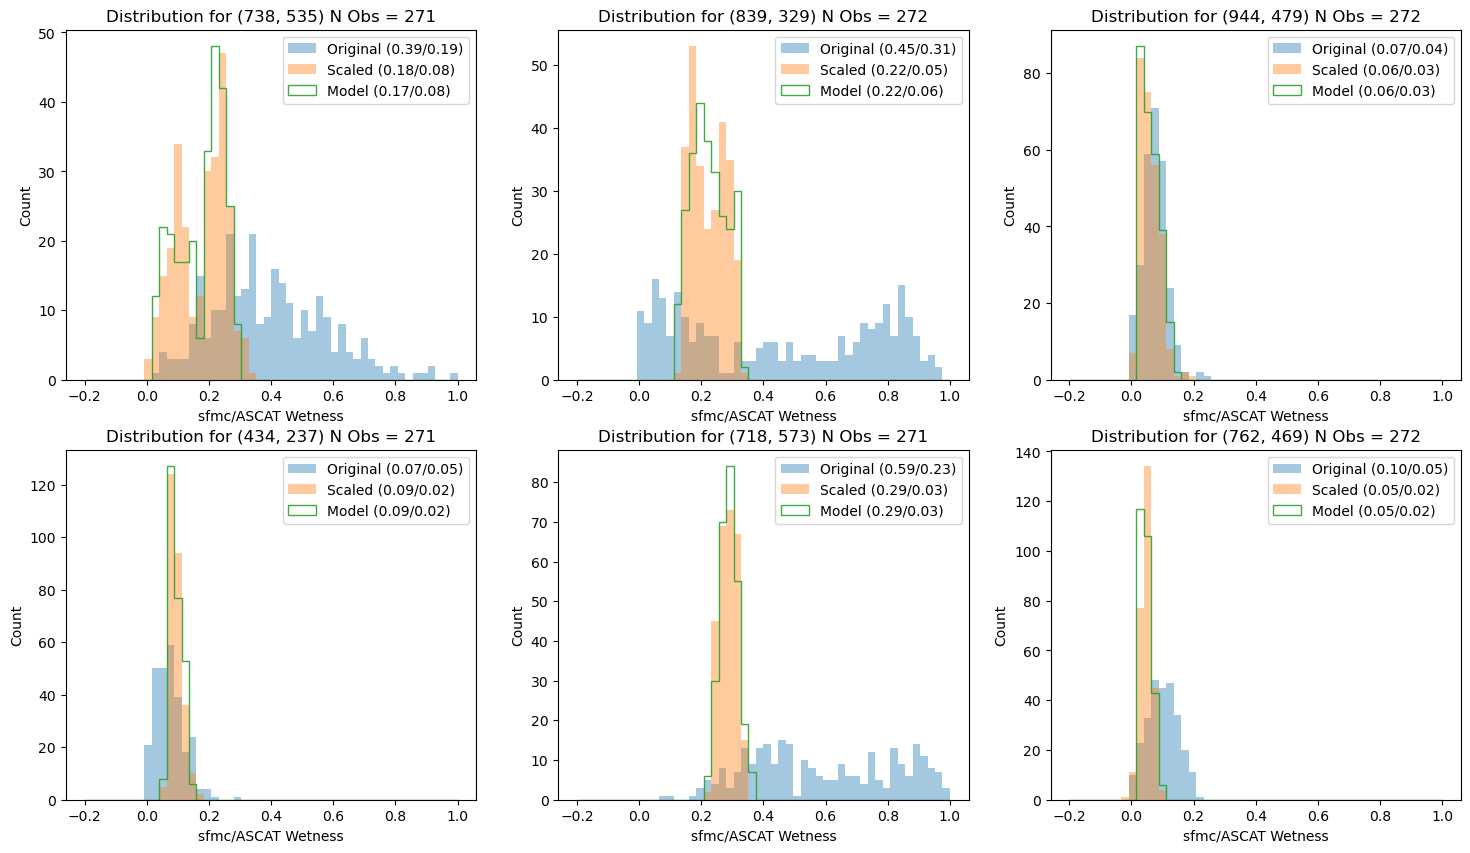

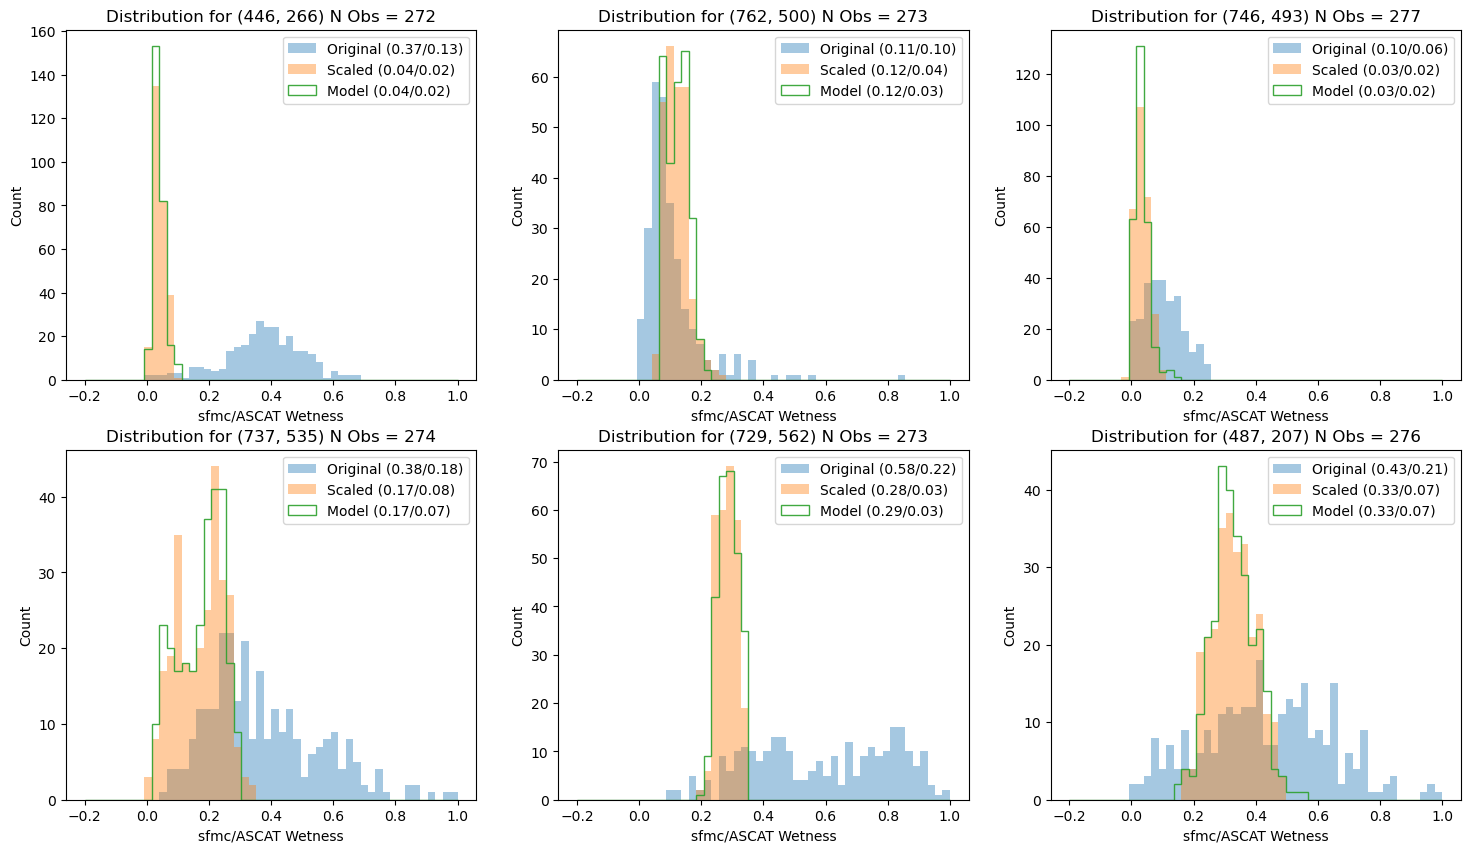

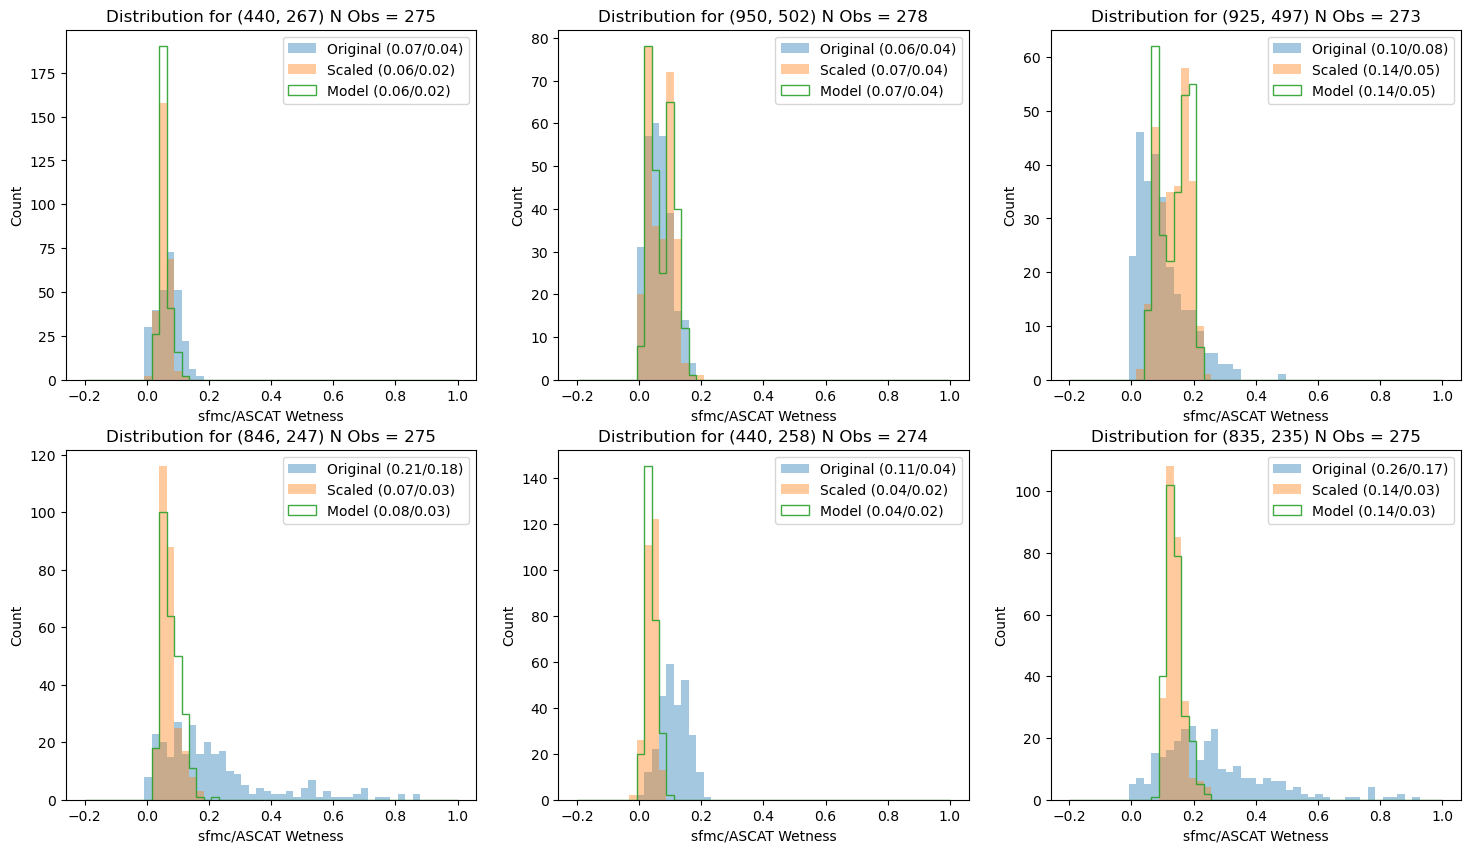

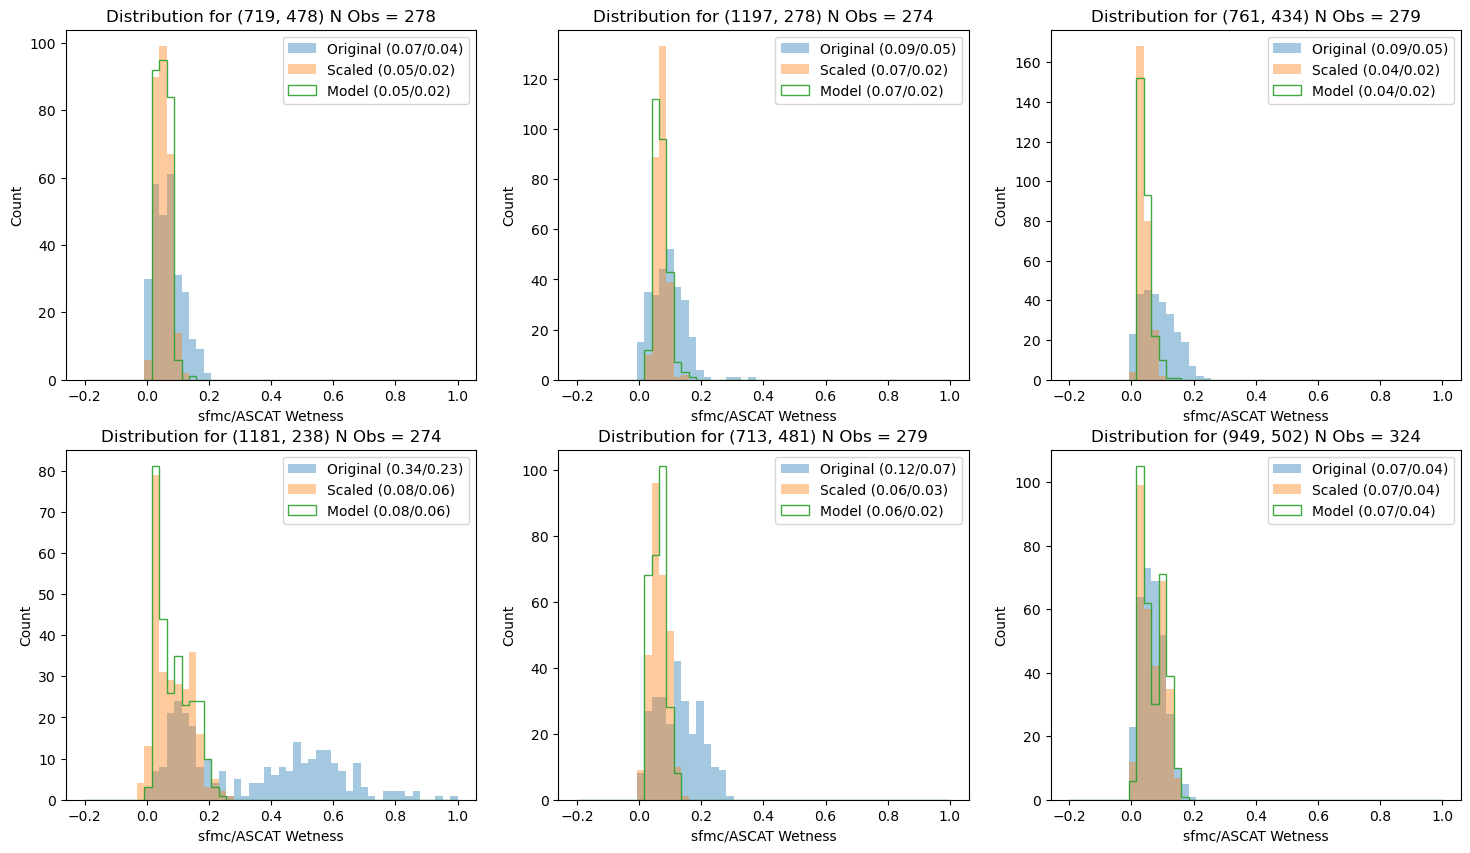

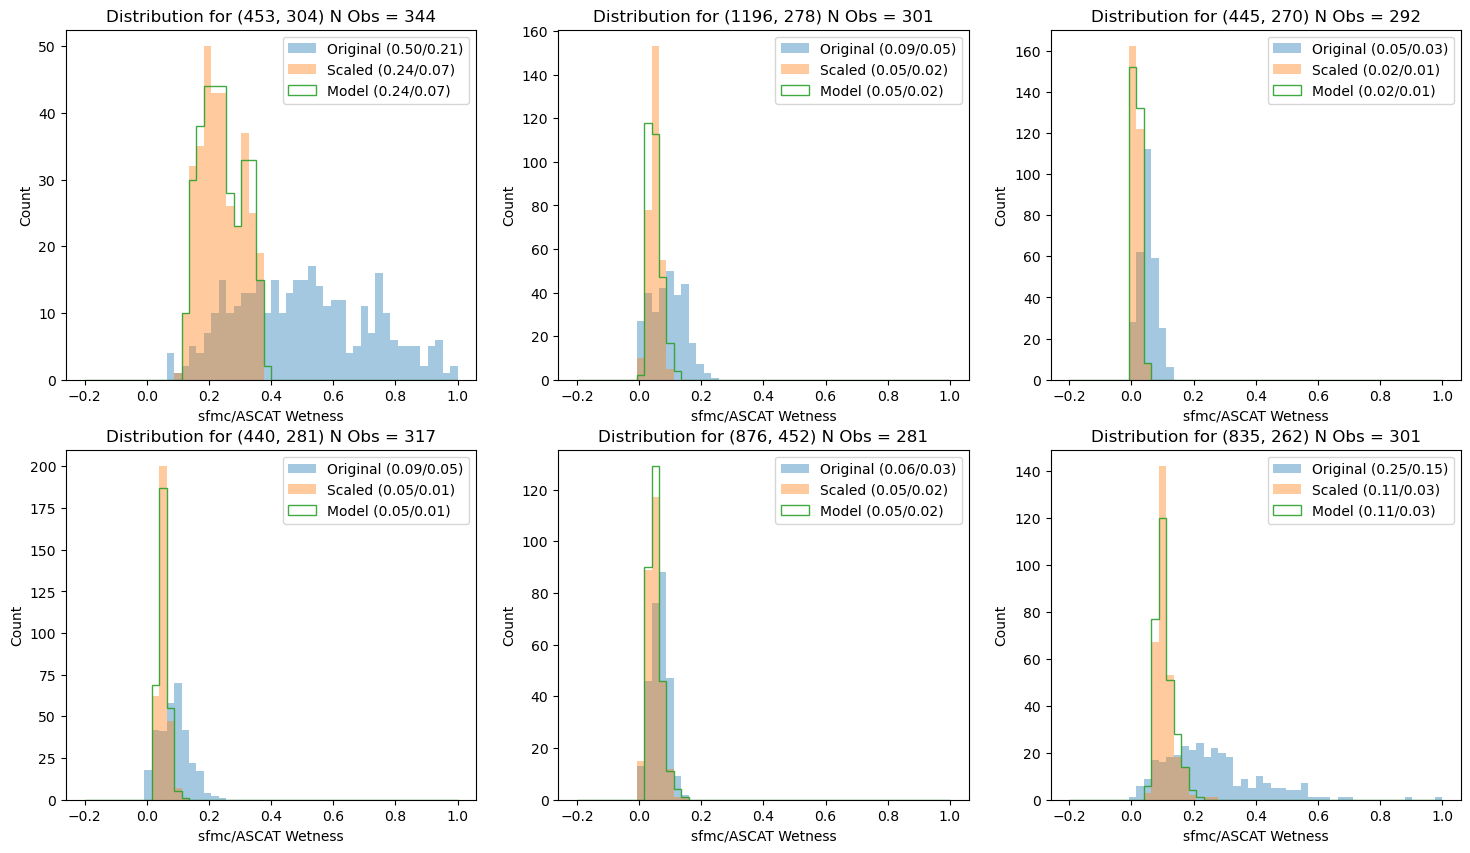

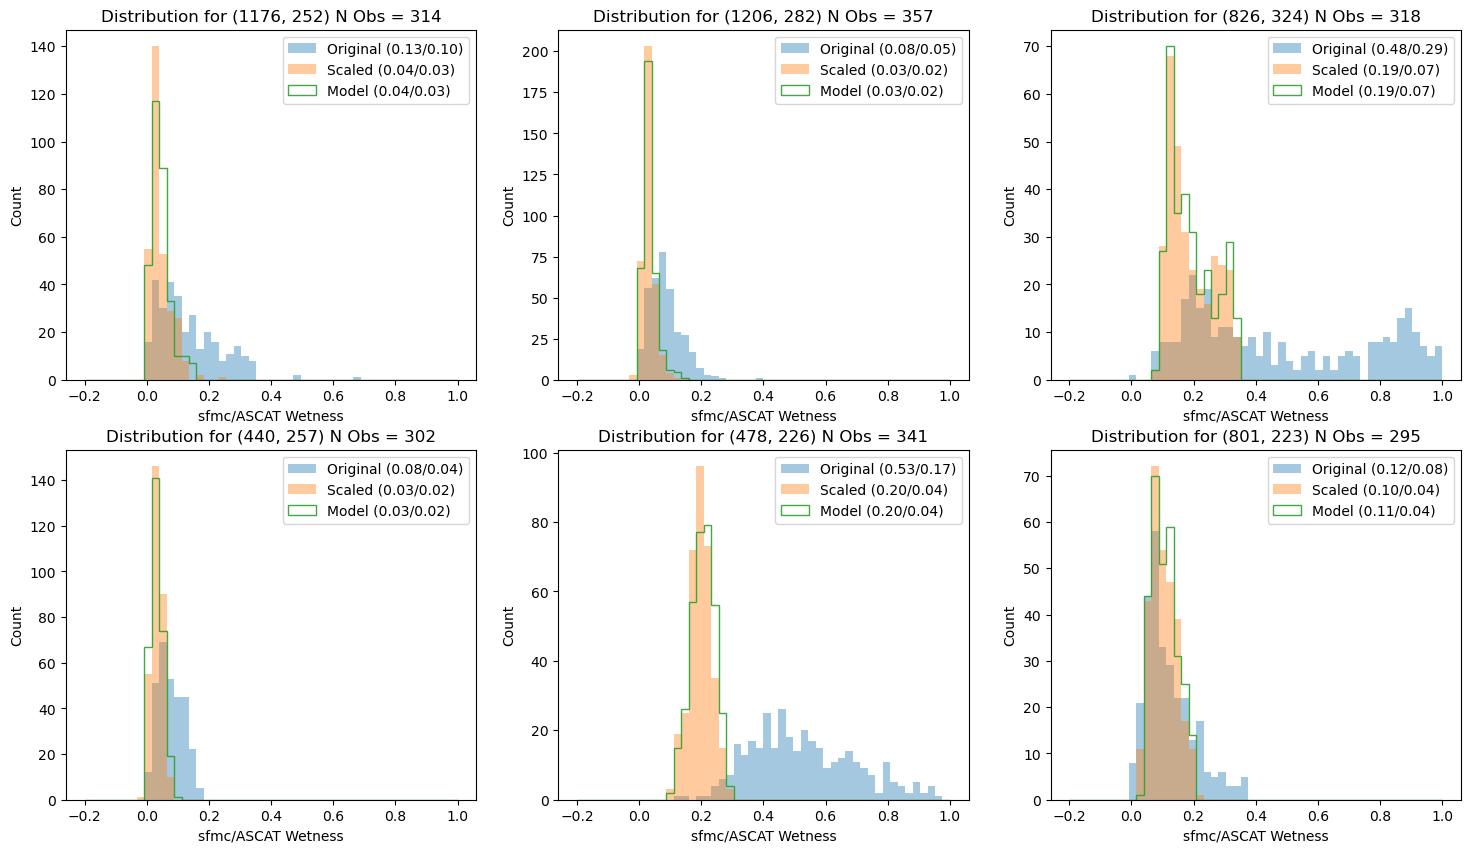

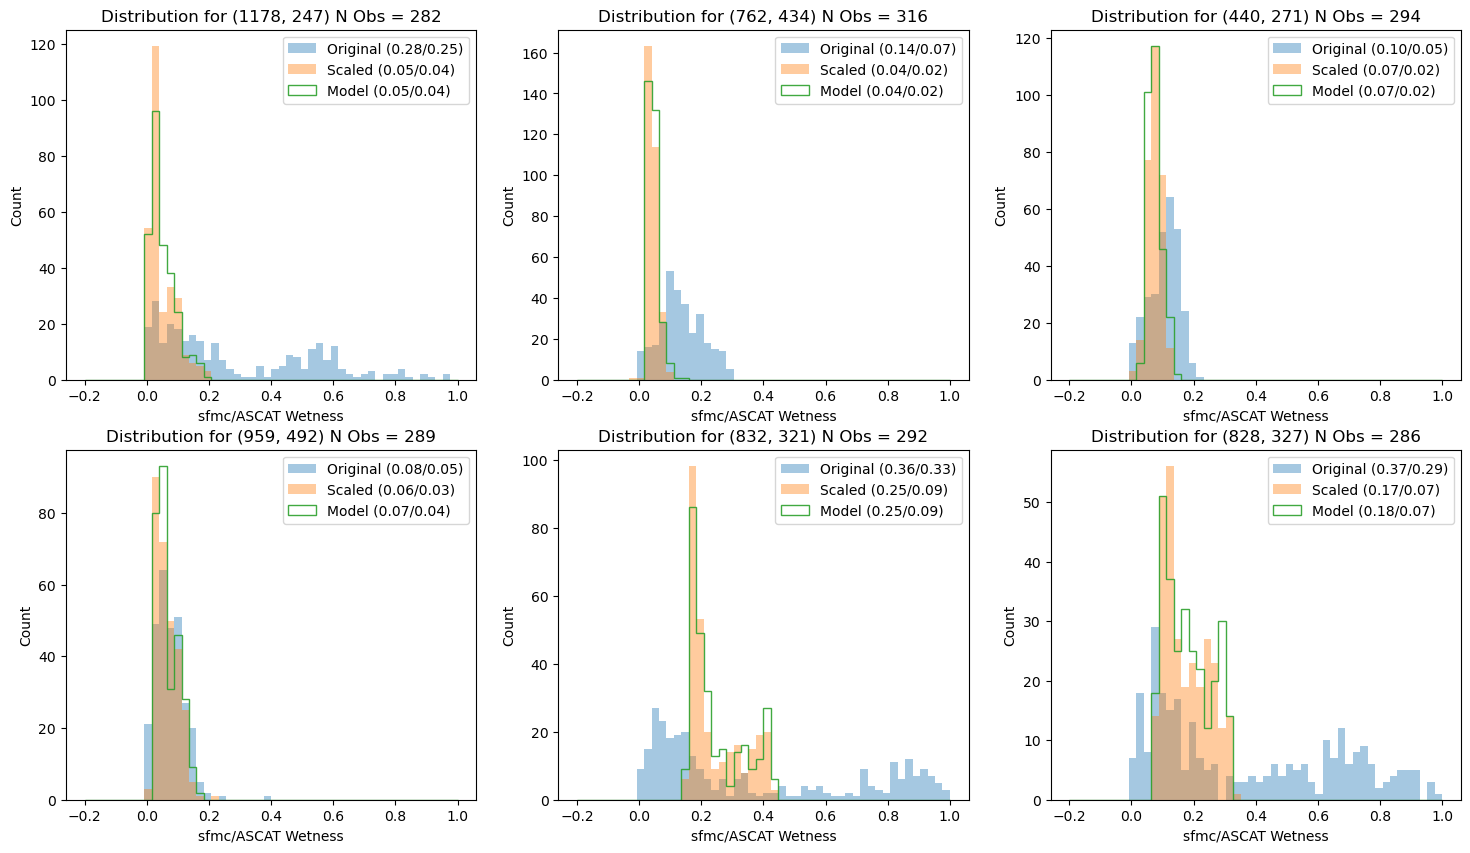

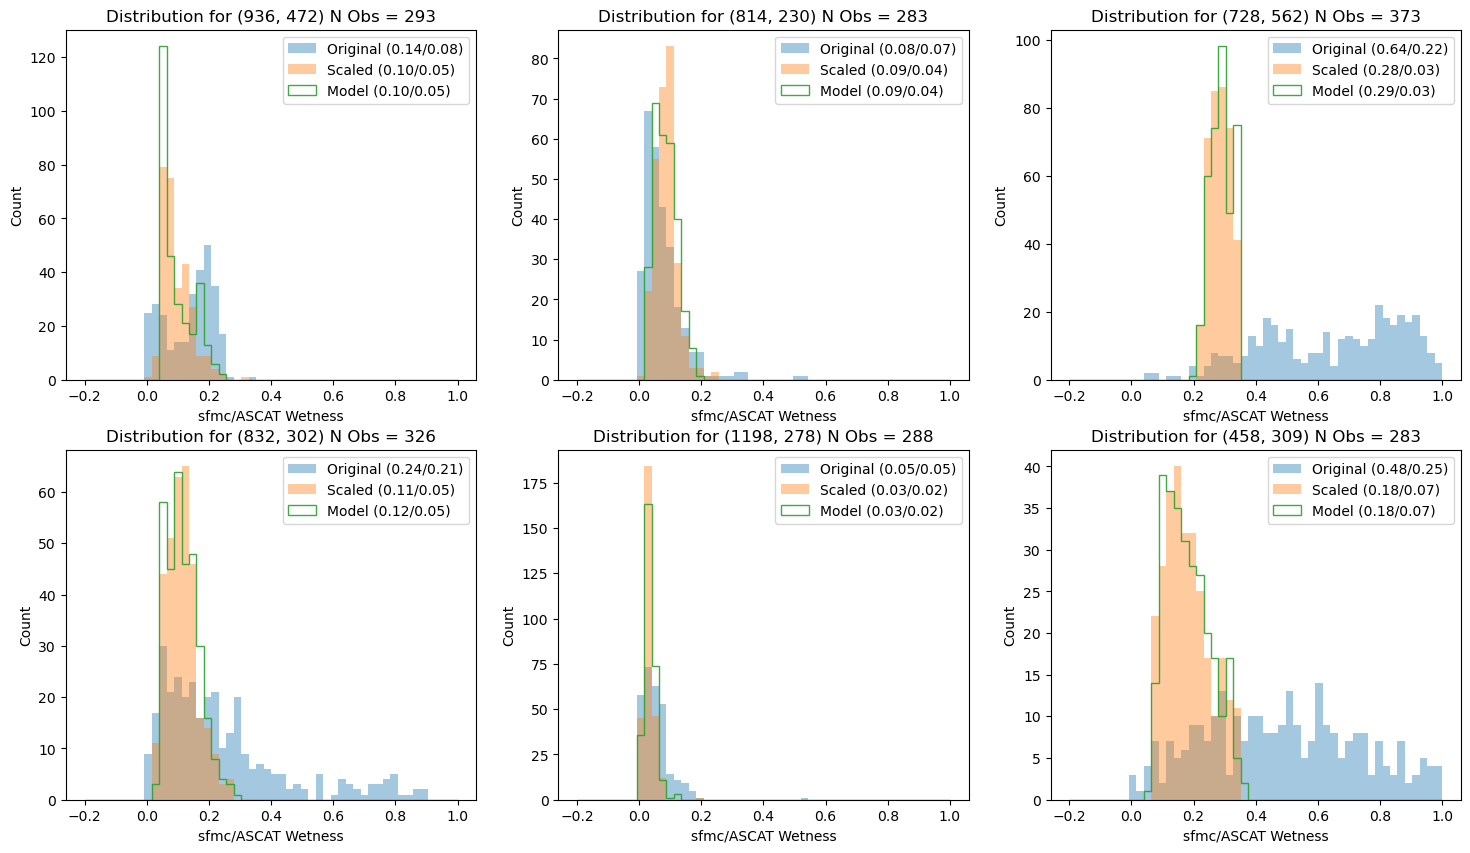

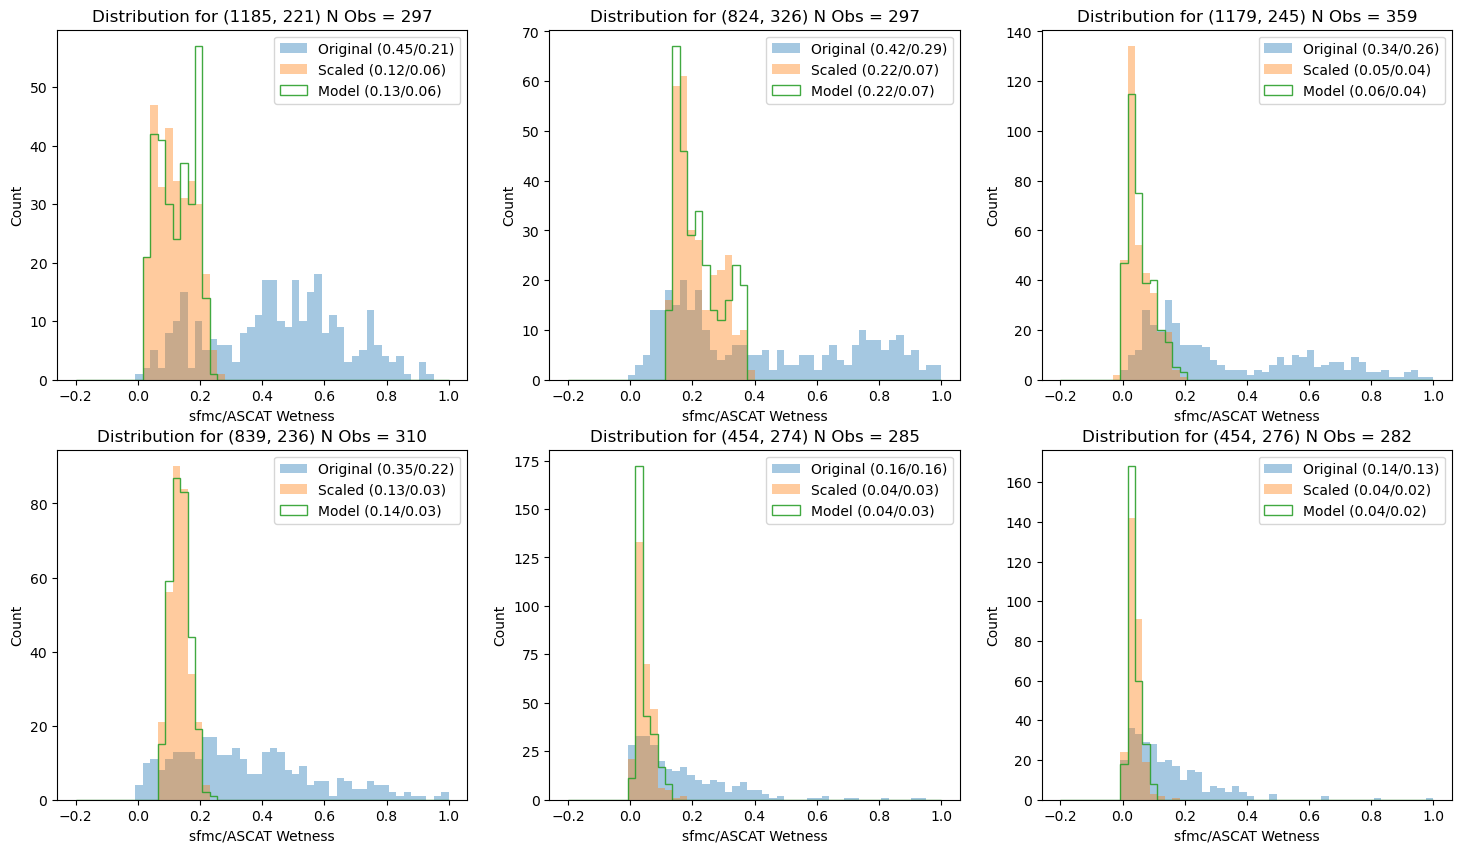

In [20]:
# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Counter for the number of pairs plotted
counter = 0
figure_counter = 0
cnt = -1

# Loop over pairs and plot on subplots
for pair in pair_indices:
    cnt += 1

    data1 = obs_obs[pair_indices[pair]]
    # Check if data1 is empty
    if len(data1) == 0:
        continue  # Move to the next pair if data1 is empty

    data2 = obs_obs_s[pair_indices_s[pair]]
    data3 = obs_fcst[pair_indices[pair]]
    data4 = tmp_obs[pair_indices[pair]]

    mean_data1 = np.mean(data1)
    mean_data2 = np.mean(data2)
    mean_data3 = np.mean(data3)
    mean_data4 = np.mean(data4)

    std_data1 = np.std(data1)
    std_data2 = np.std(data2)
    std_data3 = np.std(data3)
    std_data4 = np.std(data4)

    # Define bin edges
    combined_data = np.concatenate([data1, data2, data3, data4])
    # bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)
    bin_edges = np.linspace(-0.2, 1.0, 51)

    if counter >= 6:
        # Save the previous figure
        fig_filename = 'top_sites_{}.png'.format(figure_counter)
        fig.savefig(fig_filename)

        # Create new figure if counter reaches 6
        fig, axs = plt.subplots(2, 3, figsize=(18, 10))
        counter = 0

        # Increment the figure counter
        figure_counter += 1

    # Plot on the corresponding subplot
    ax = axs.flat[counter]
    n1, bins, patches = ax.hist(data1, density=False, bins=bin_edges, alpha=0.4, label='Original ({:.2f}/{:.2f})'.format(mean_data1, std_data1))
    n2, bins, patches = ax.hist(data2, density=False, bins=bin_edges, alpha=0.4, label='Scaled ({:.2f}/{:.2f})'.format(mean_data2, std_data2))
    n3, bins, patches = ax.hist(data3, density=False, bins=bin_edges, alpha=0.9, label='Model ({:.2f}/{:.2f})'.format(mean_data3, std_data3), histtype='step')
    #n4, bins, patches = ax.hist(data4, density=False, bins=bin_edges, alpha=0.9, label='Offline ({:.2f}/{:.2f})'.format(mean_data4, std_data4), histtype='step')

    # Add labels and title
    ax.set_xlabel('sfmc/ASCAT Wetness')
    ax.set_ylabel('Count')
    ax.set_title('Distribution for ({}, {}) N Obs = {}'.format(pair[0], pair[1], len(data1)))

    ax.legend()

    # Increment the counter
    counter += 1

# Save the last figure
fig_filename = 'top_sites_{}.png'.format(figure_counter)
fig.savefig(fig_filename)

# Close the figure
plt.close(fig)

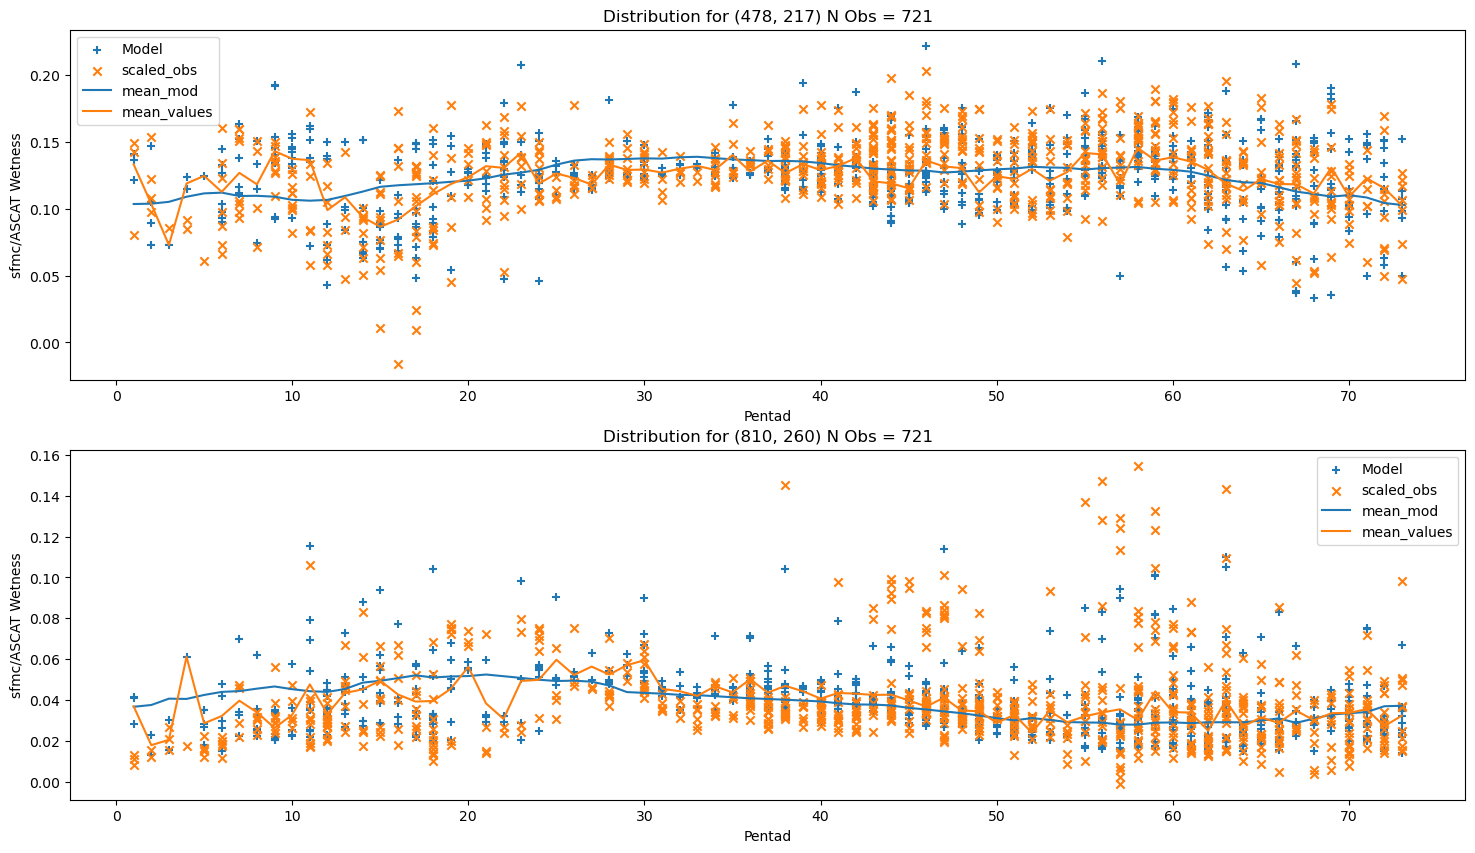

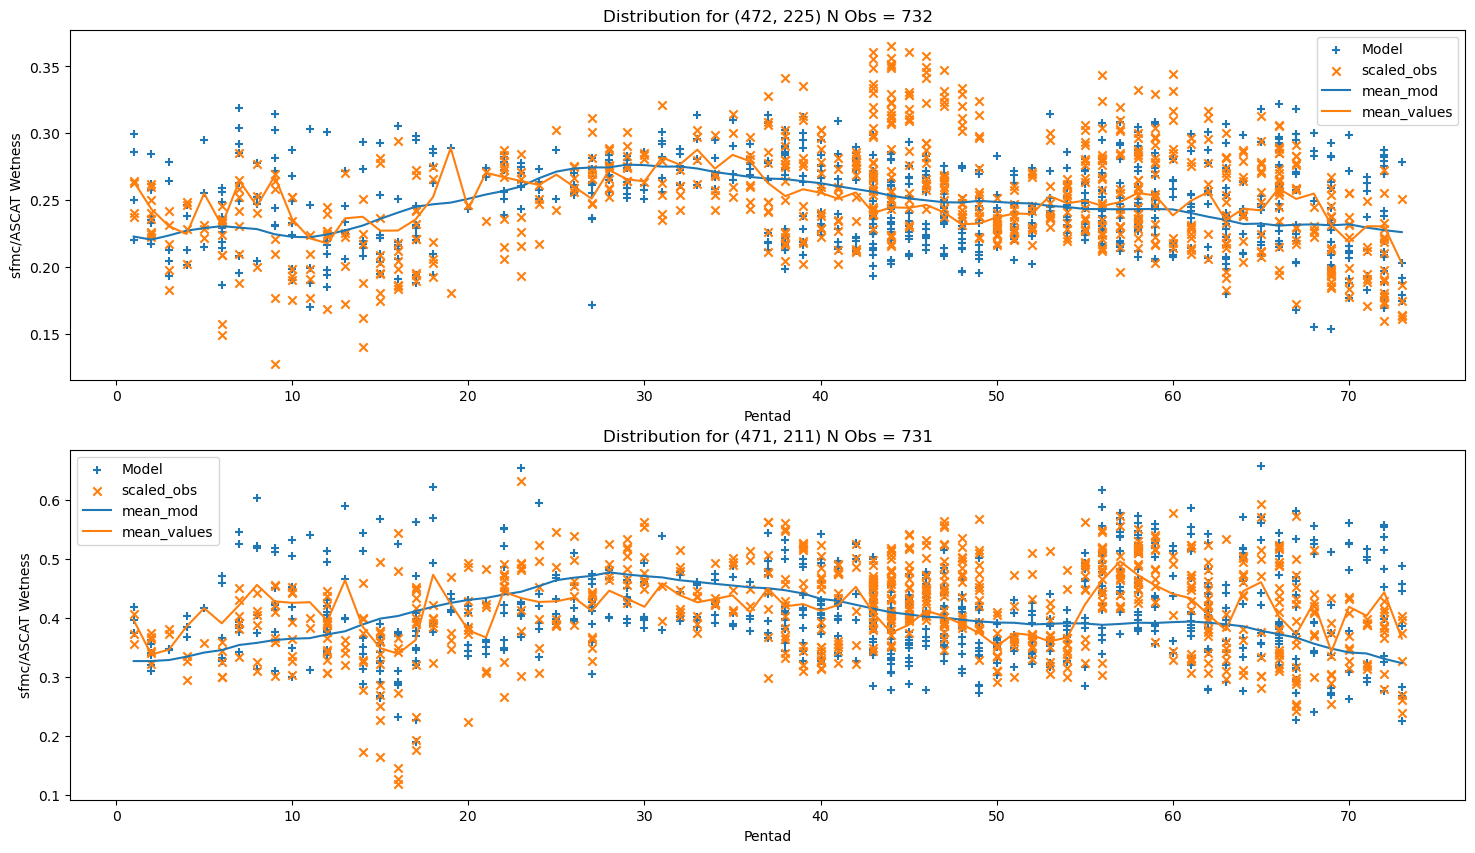

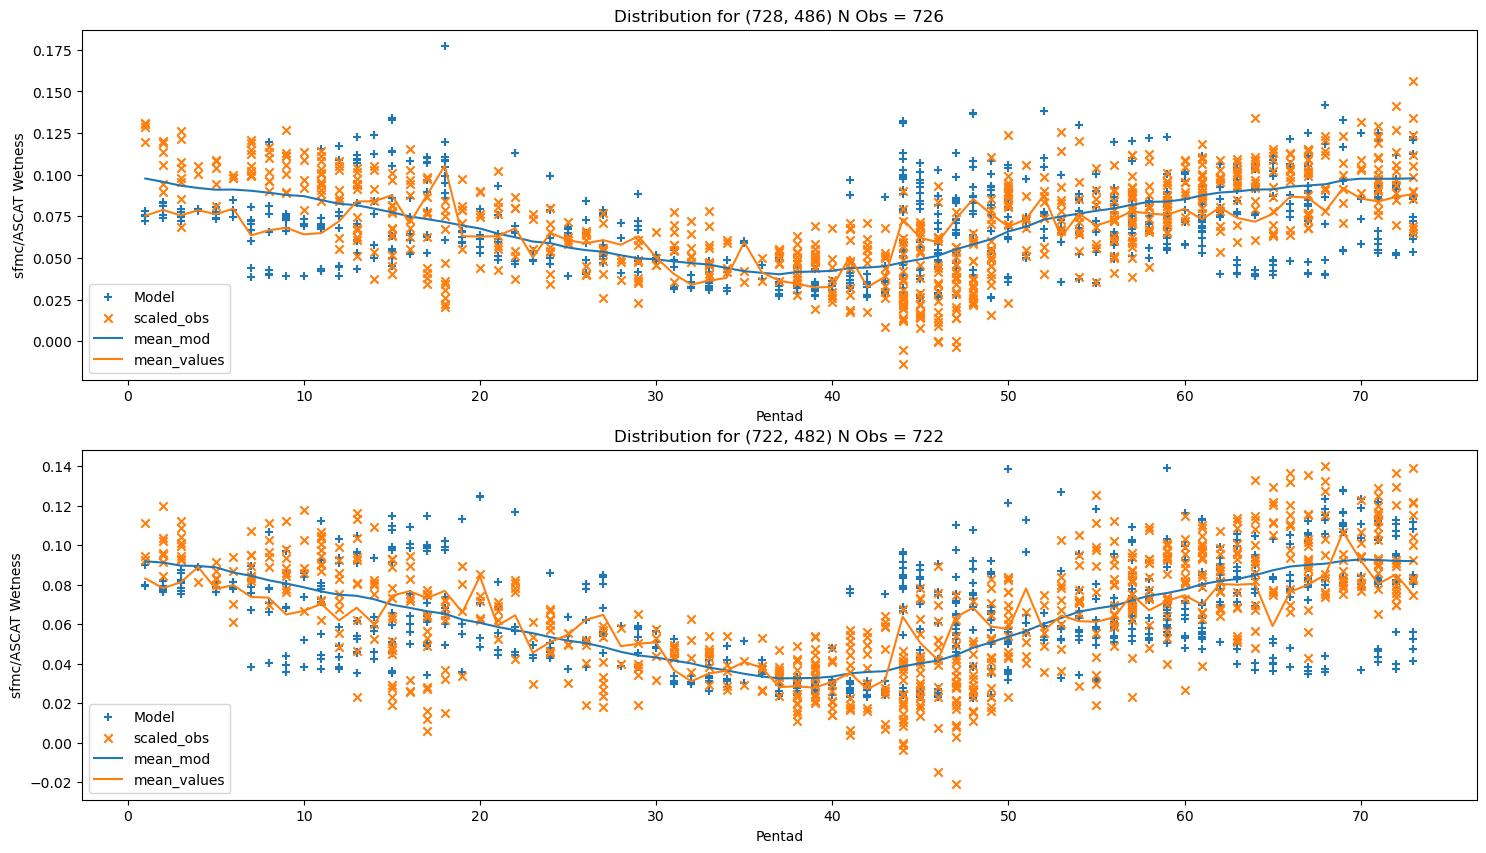

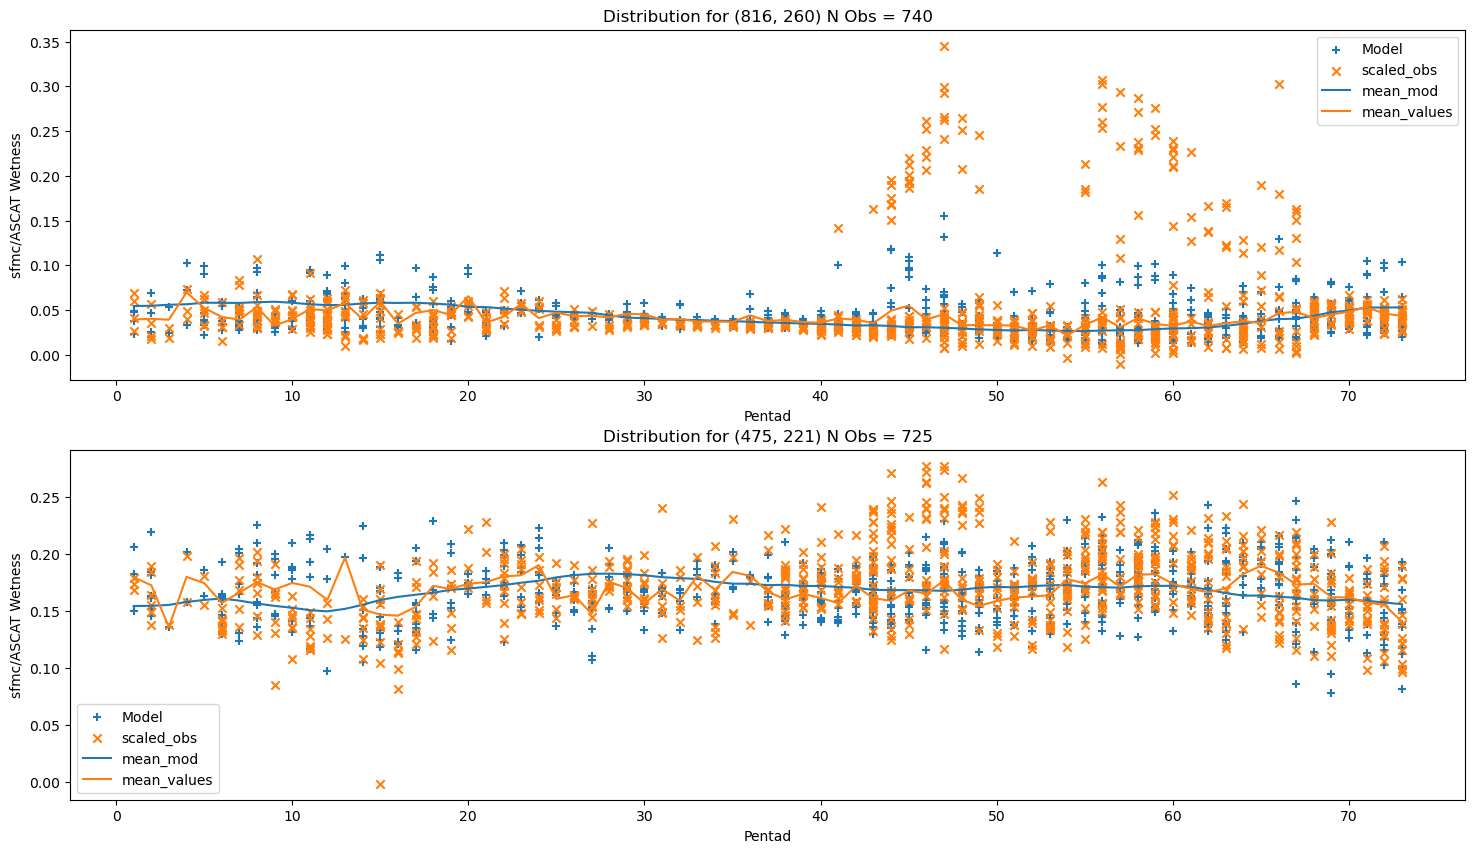

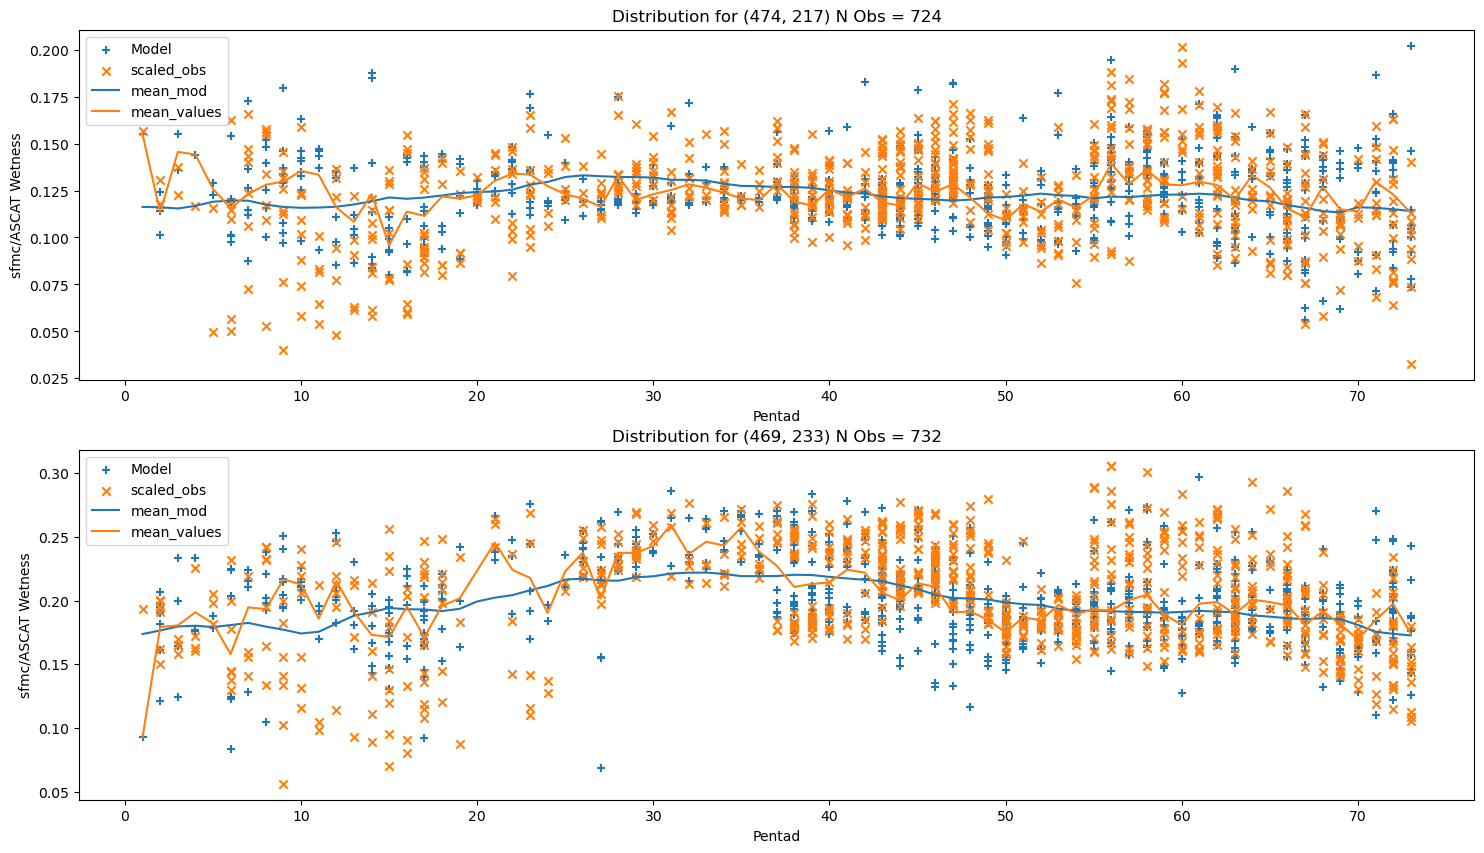

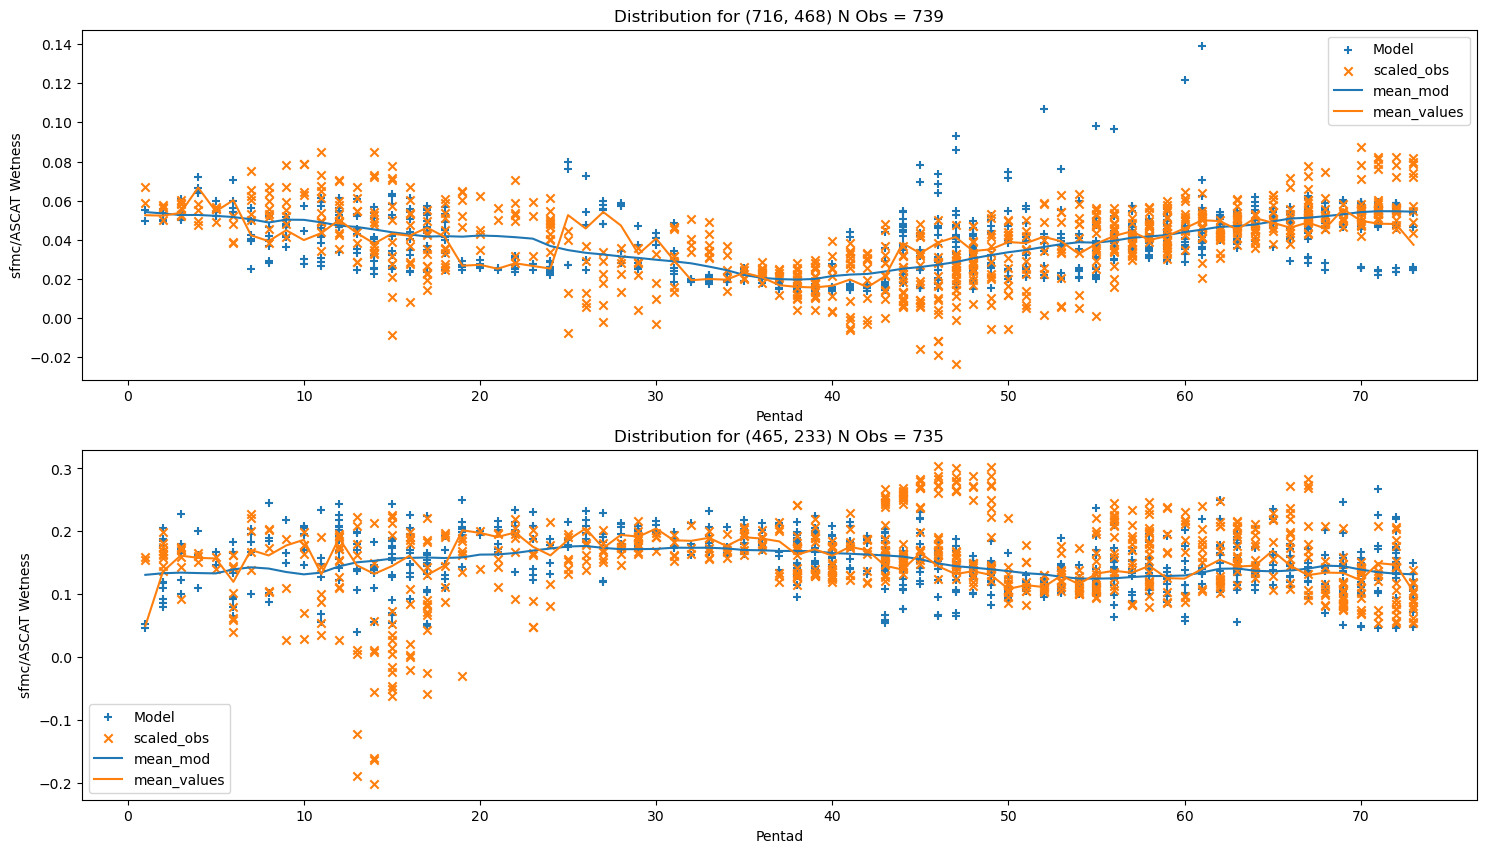

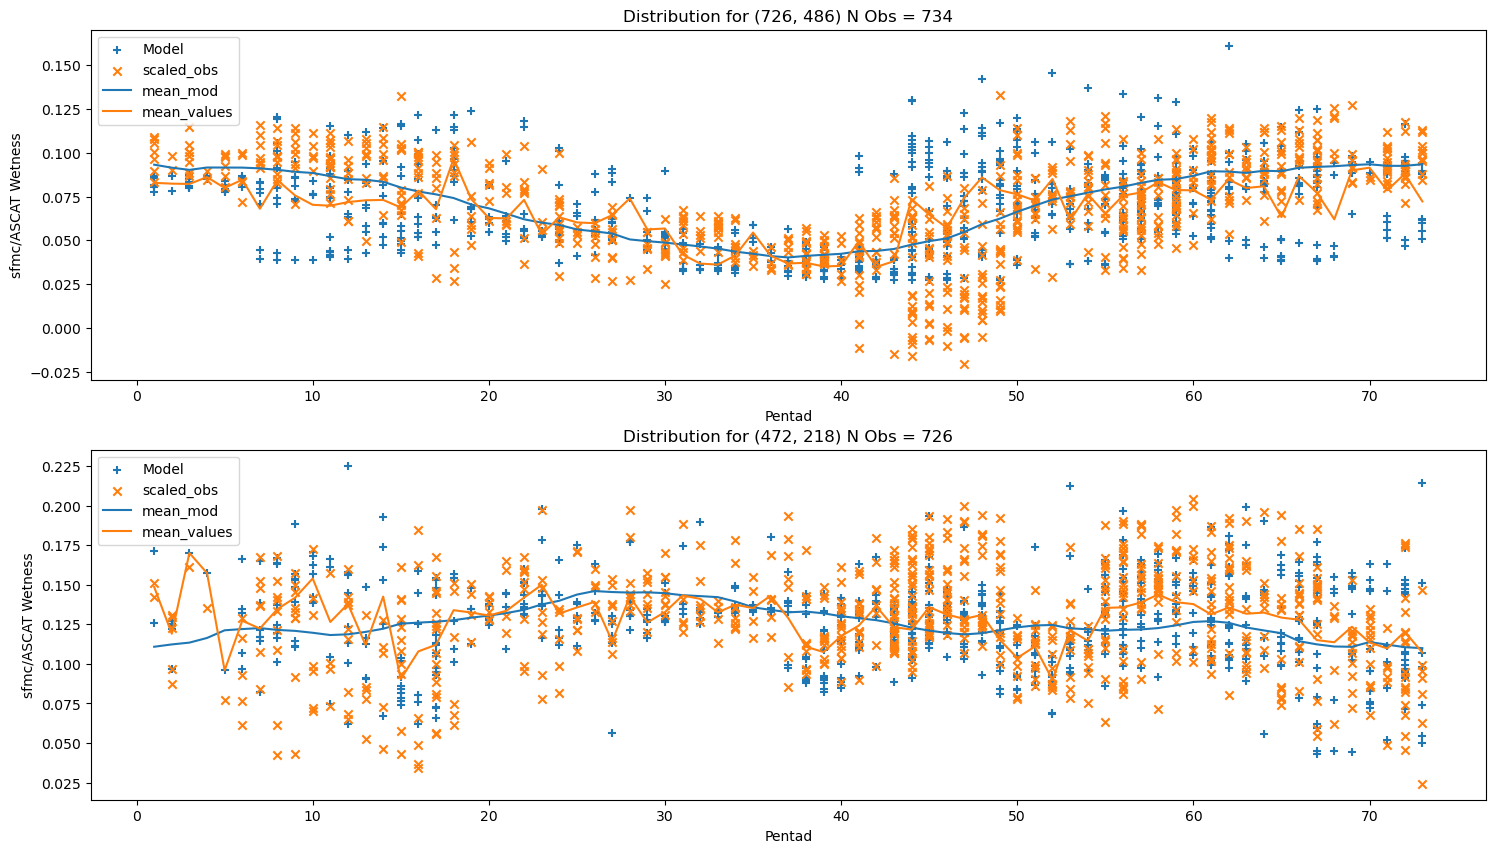

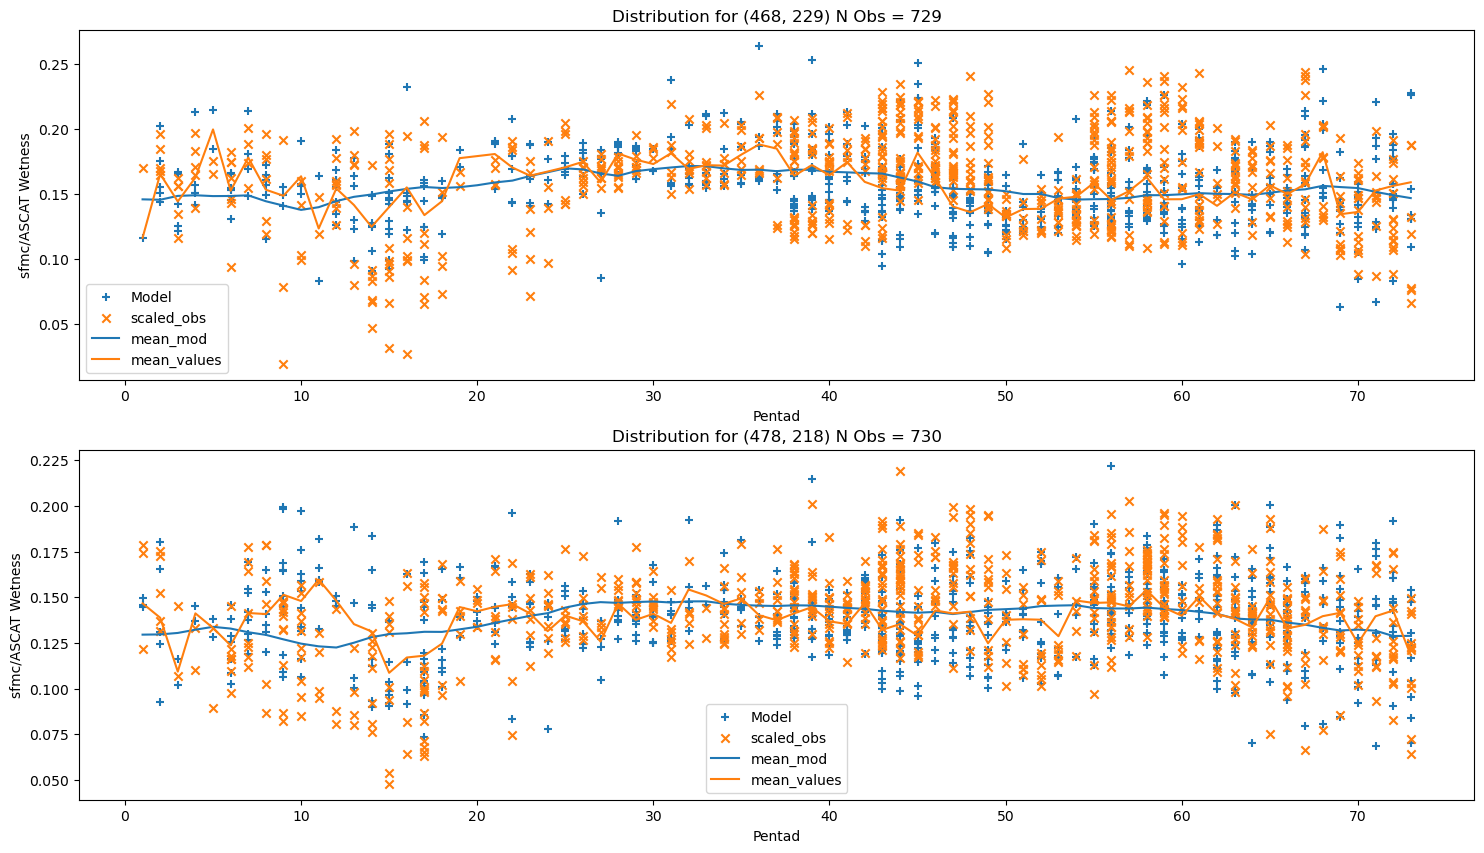

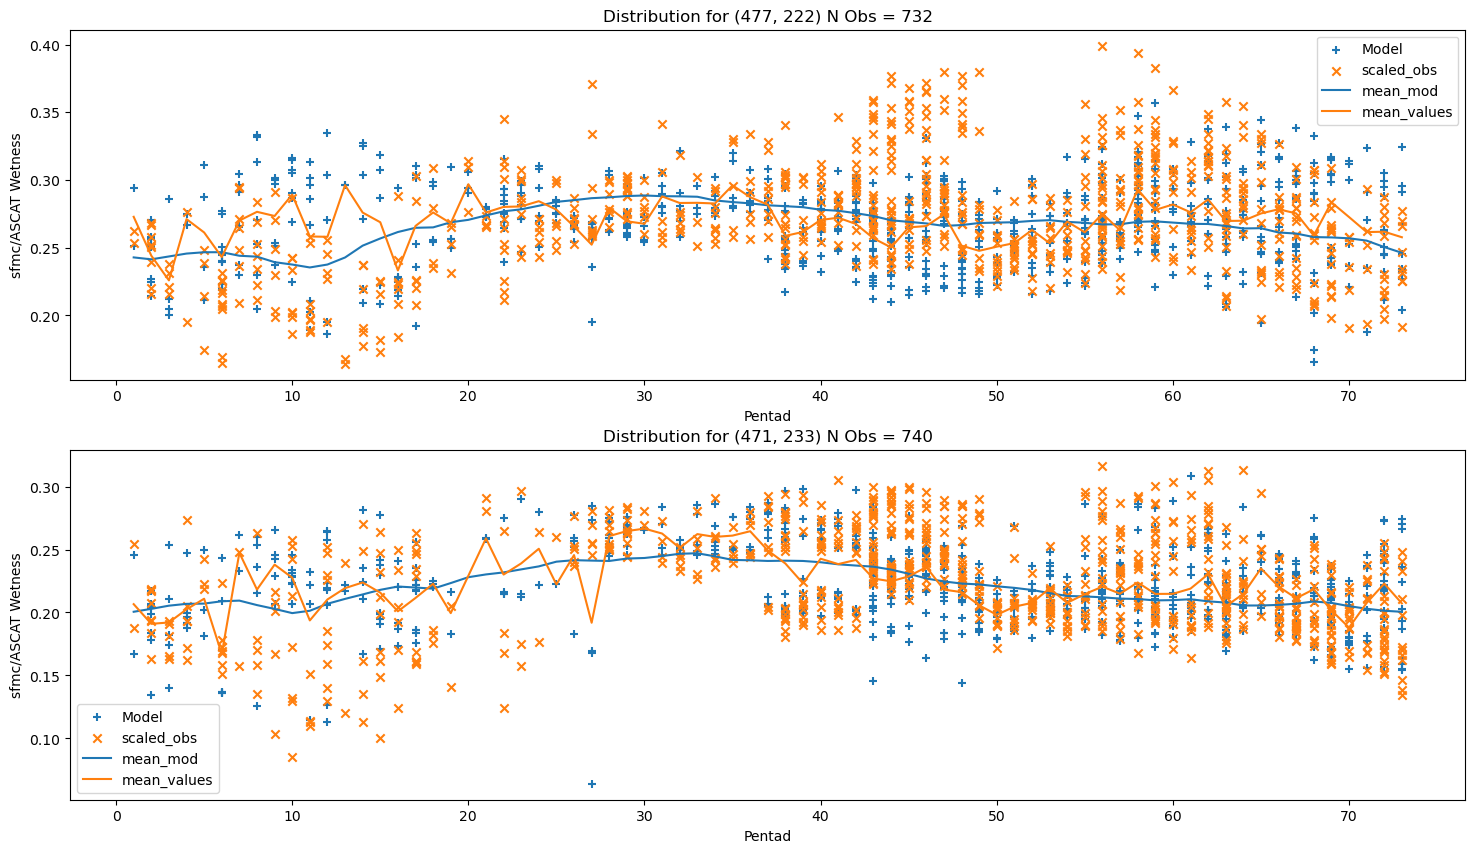

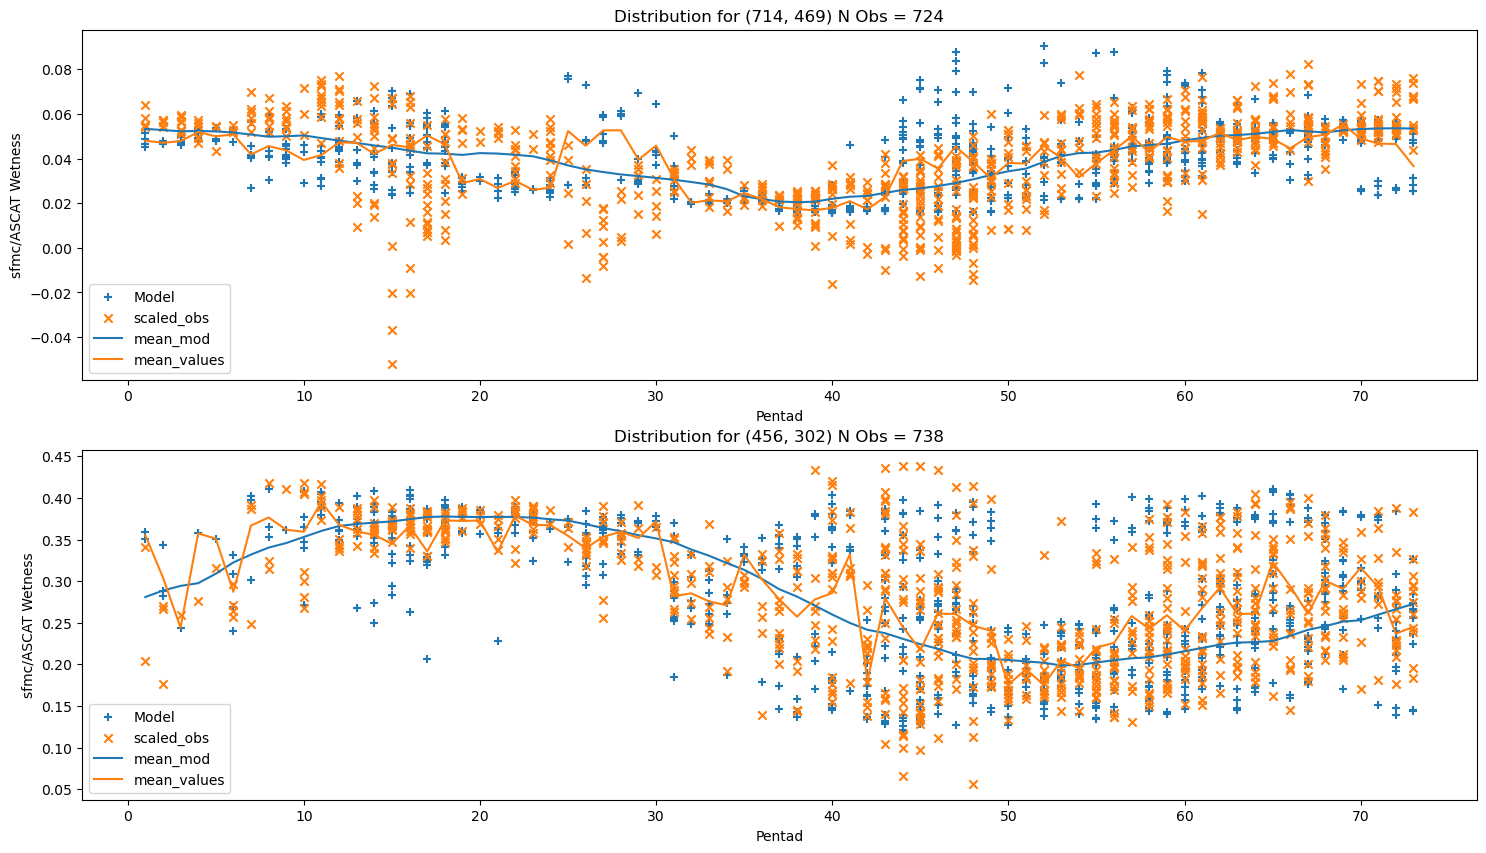

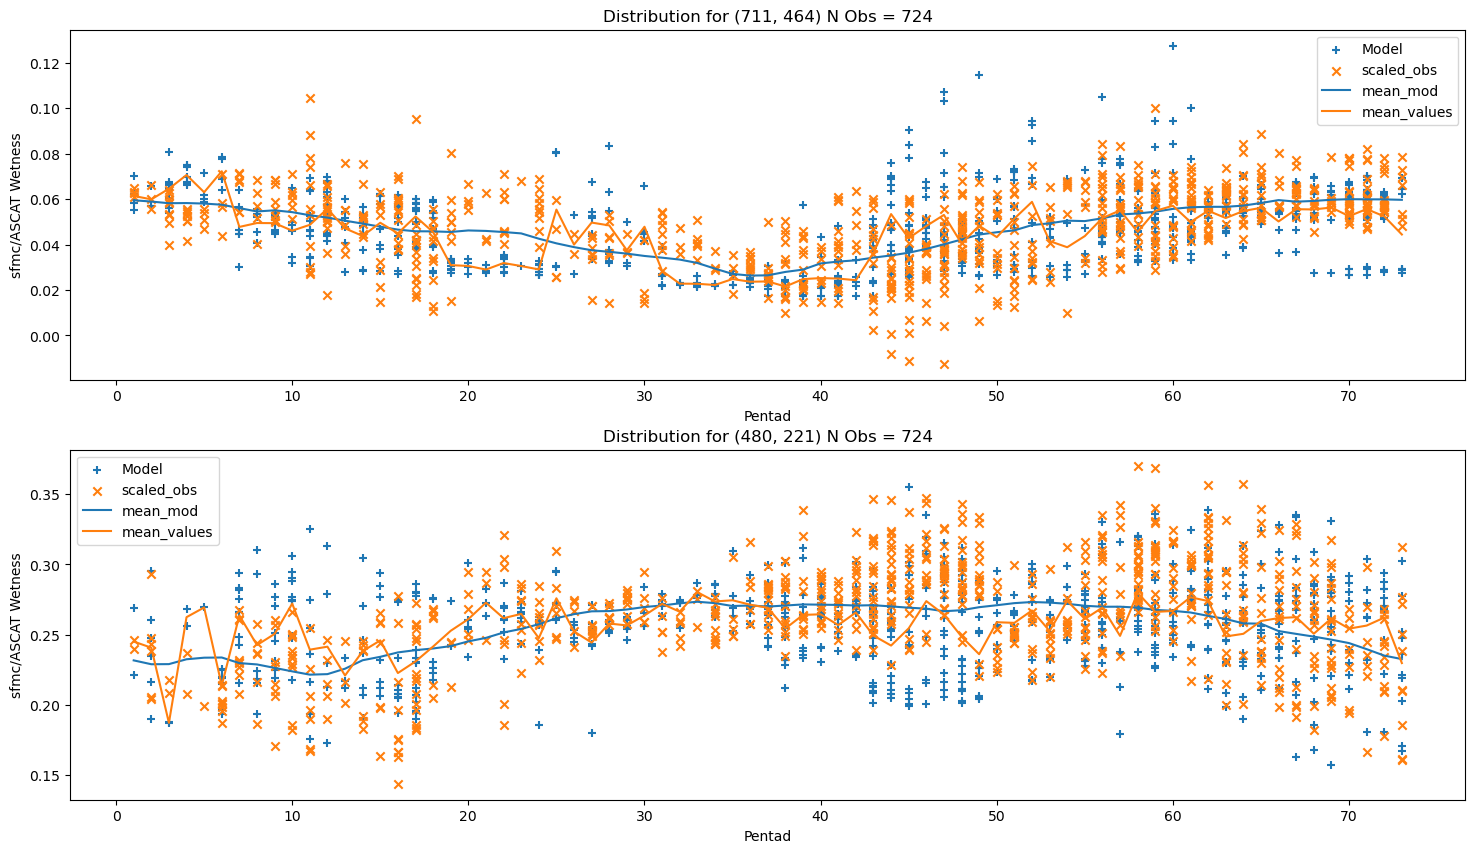

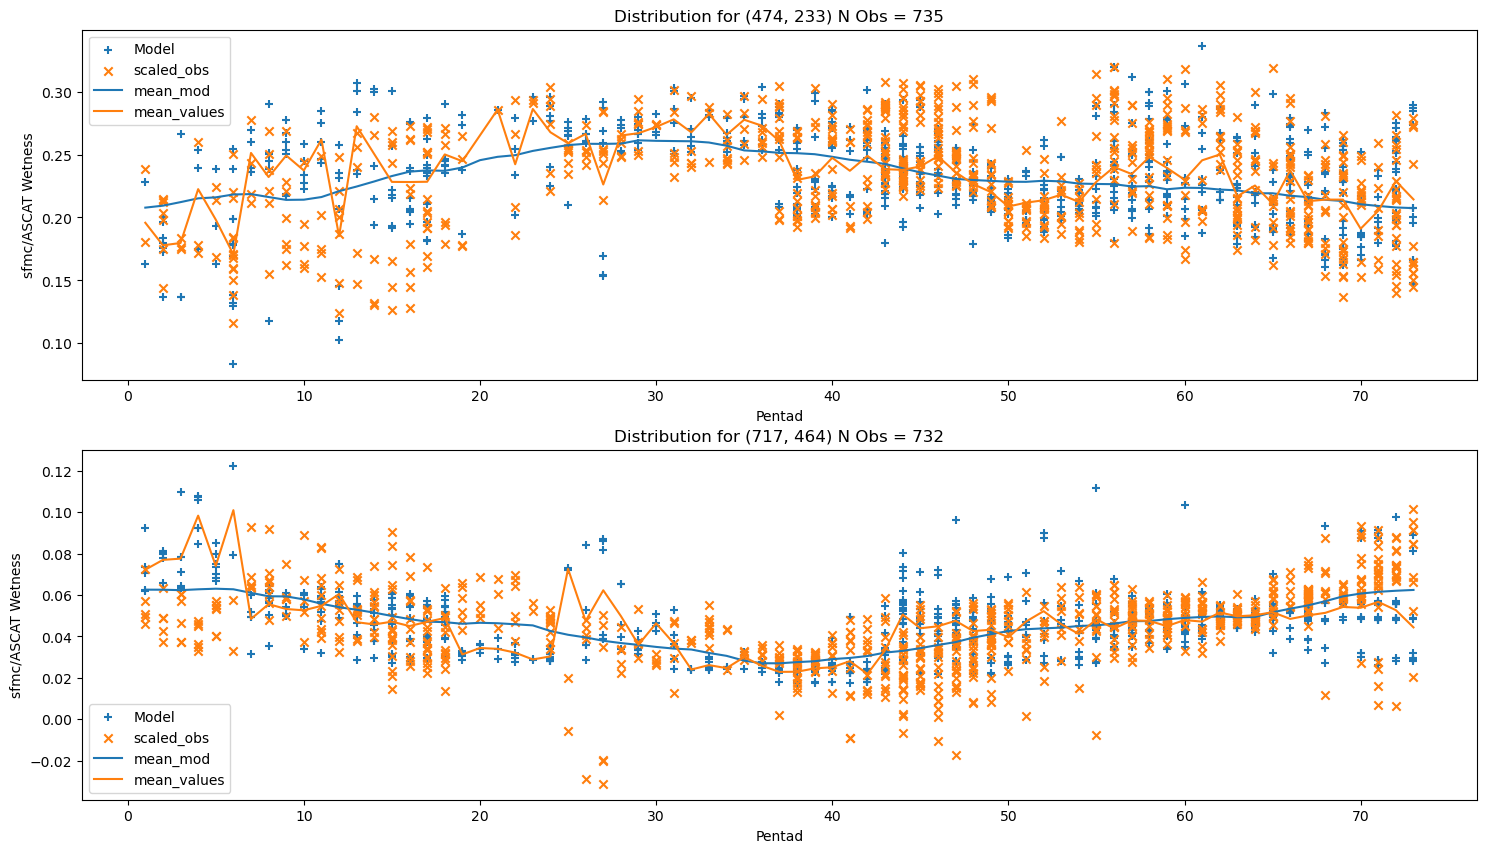

In [36]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(18, 10))

# Counter for the number of pairs plotted
counter = 0
figure_counter = 0
cnt = -1

# Loop over pairs and plot on subplots
for pair in pair_indices:
    cnt += 1

    data1 = obs_obs[pair_indices[pair]]
    # Check if data1 is empty
    if len(data1) == 0:
        continue  # Move to the next pair if data1 is empty
    if cnt > 24:
        continue

    data2 = obs_obs_s[pair_indices_s[pair]]
    data3 = obs_fcst[pair_indices[pair]]
    data4 = tmp_obs[pair_indices[pair]]
    data5 = pentad2[pair_indices[pair]]

    # Group the values by key
    unique_keys = np.unique(data5)

    # Dictionary to store grouped values
    grouped_values = {}

    # Group the values by key
    for key in unique_keys:
      values_for_key = data3[data5 == key]
      grouped_values[key] = values_for_key

    # Example operation: Compute the mean for each group
    std_values = {key: np.std(values) for key, values in grouped_values.items()}
    mean_values = {key: np.mean(values) for key, values in grouped_values.items()}
 
    cnt2 = 0
    scaled_obs = np.zeros(len(data5))

    for pp in data5:
        p = int(pp) - 1
        scaled_obs[cnt2] = sclprm_mean_mod_3D[p, pair[0], pair[1]] + (sclprm_std_mod_3D[p, pair[0], pair[1]]/sclprm_std_obs_3D[p, pair[0], pair[1]]) * (data1[cnt2] - sclprm_mean_obs_3D[p, pair[0], pair[1]])
        cnt2 += 1


    mean_data1 = np.mean(data1)
    mean_data2 = np.mean(data2)
    mean_data3 = np.mean(data3)
    mean_data4 = np.mean(data4)

    std_data1 = np.std(data1)
    std_data2 = np.std(data2)
    std_data3 = np.std(data3)
    std_data4 = np.std(data4)

    # Define bin edges
    combined_data = np.concatenate([data1, data2, data3, data4])
    # bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)
    bin_edges = np.linspace(-0.2, 1.0, 51)

    if counter >= 2:
        # Save the previous figure
        fig_filename = 'top_sites_{}.png'.format(figure_counter)
        fig.savefig(fig_filename)

        # Create new figure if counter reaches 6
        fig, axs = plt.subplots(2, 1, figsize=(18, 10))
        counter = 0

        # Increment the figure counter
        figure_counter += 1

    # Plot on the corresponding subplot
    ax = axs.flat[counter]
    # Plot the ij_pairs on top of the pair_count array
    #ax.scatter(data5, data1,label='Original', s=10)
    #ax.scatter(data5, data2,label='Scaled', s=10)
    ax.scatter(data5, data3,label='Model',marker='+')
    ax.scatter(data5, scaled_obs,label='scaled_obs', marker='x')
    

    #ax.plot(np.arange(1, 74), sclprm_mean_obs_3D[:, pair[0], pair[1]], label='mean_obs')
    ax.plot(np.arange(1, 74), sclprm_mean_mod_3D[:, pair[0], pair[1]], label='mean_mod')
    #ax.plot(np.arange(1, 74), sclprm_std_mod_3D[:, pair[0], pair[1]],label='std_mod')
    #ax.plot(np.arange(1, 74), sclprm_std_obs_3D[:, pair[0], pair[1]],label='std_obs')
    #ax.plot(list(std_values.keys()), list(std_values.values()),label='std_values')
    ax.plot(list(mean_values.keys()), list(mean_values.values()),label='mean_values')

    # Add labels and title
    ax.set_xlabel('Pentad')
    ax.set_ylabel('sfmc/ASCAT Wetness')
    ax.set_title('Distribution for ({}, {}) N Obs = {}'.format(pair[0], pair[1], len(data1)))

    ax.legend()

    # Increment the counter
    counter += 1

# Save the last figure
fig_filename = 'top_sites_{}.png'.format(figure_counter)
# fig.savefig(fig_filename)

# Close the figure
plt.close(fig)

In [ ]:
len(data5), len(scaled_obs)

In [19]:
import pandas as pd

# Specify the file path
csv_file = csv_file = '../test_data/refpix_SM_masterlist.txt'

# Read the CSV file
df = pd.read_csv(csv_file)

# Remove leading/trailing whitespaces from column names
df.columns = df.columns.str.strip()

# Filter the DataFrame to include only rows with 'Alias' of two characters long
df = df[df['Alias'].str.len() == 2]

# Group the DataFrame by 'Alias' and retrieve the first occurrence of each group
first_occurrences = df.groupby('Alias').nth(1)

# Extract the 'Lat' and 'Lon' values for the first occurrences
first_alias = first_occurrences.index
first_lat = first_occurrences['Lat']
first_lon = first_occurrences['Lon']

# Print the first occurrences and their corresponding lat and lon values
for alias, lat, lon in zip(first_occurrences.index, first_lat, first_lon):
    print(f"Alias: {alias}, Lat: {lat}, Lon: {lon}")

# Perform further operations with the data
# ...


Alias: BN, Lat: 9.7667, Lon: 1.6805
Alias: BV, Lat: -32.6215, Lon: -62.5519
Alias: CR, Lat: 49.5623, Lon: -98.0192
Alias: CS, Lat: 45.2931, Lon: -74.8755
Alias: EU, Lat: 46.6894, Lon: 10.5965
Alias: FC, Lat: 35.4214, Lon: -98.6203
Alias: HB, Lat: 55.9704, Lon: 9.0992
Alias: HO, Lat: 48.1047, Lon: 15.1712
Alias: KN, Lat: 51.3627, Lon: -106.2713
Alias: KW, Lat: 29.298, Lon: 47.2873
Alias: KY, Lat: -35.37, Lon: 147.572
Alias: LR, Lat: 31.5972, Lon: -83.5892
Alias: LW, Lat: 34.8769, Lon: -98.0913
Alias: MB, Lat: -32.9576, Lon: -62.5332
Alias: MH, Lat: 46.0963, Lon: 106.6183
Alias: MP, Lat: 0.4856, Lon: 36.87
Alias: MQ, Lat: 33.8677, Lon: 102.0369
Alias: MX, Lat: 17.9278, Lon: -92.8119
Alias: NG, Lat: 32.9562, Lon: 79.7303
Alias: NI, Lat: 13.5868, Lon: 2.6452
Alias: NQ, Lat: 31.2949, Lon: 92.0539
Alias: NY, Lat: 41.8546, Lon: -73.6151
Alias: RC, Lat: 43.147, Lon: -116.766
Alias: RM, Lat: 41.302, Lon: -5.4118
Alias: SA, Lat: 68.3605, Lon: 27.5882
Alias: SF, Lat: 42.4701, Lon: -93.3921
Alias:

In [20]:
first_lat[0]

i_ind = int((first_lon[0] - ll_lon)/dlon + 1) # Add 1 to ceil equivalent in Fortran
j_ind = int((first_lat[0] - ll_lat)/dlat + 1) # Add 1 to ceil equivalent in Fortran

i_ind, j_ind


(727, 400)

In [21]:
ij_pairs_c = []  # Initialize the ij_pairs list

for i in range(len(first_lon)):
    this_lon = first_lon[i]   
    this_lat = first_lat[i]  
    i_ind = int((this_lon - ll_lon)/dlon + 1) # Add 1 to ceil equivalent in Fortran
    j_ind = int((this_lat - ll_lat)/dlat + 1) # Add 1 to ceil equivalent in Fortran
    ij_pairs_c.append((i_ind, j_ind)) 

# Extract i and j values from ij_pairs
i_values_c = [pair[0] for pair in ij_pairs_c]
j_values_c = [pair[1] for pair in ij_pairs_c]
    

In [22]:
#Calculate i,j
ll_lon = -180.0
ll_lat = -90.0
dlon = 0.25
dlat = 0.25

n_obs = len(obs_obs)

i_out = np.zeros(n_obs)
j_out = np.zeros(n_obs)

for i in range(len(obs_obs)):
    this_lon = obs_lon[i]   
    this_lat = obs_lat[i]  
    i_ind = int((this_lon - ll_lon)/dlon + 1) # Add 1 to ceil equivalent in Fortran
    j_ind = int((this_lat - ll_lat)/dlat + 1) # Add 1 to ceil equivalent in Fortran
    
    i_out[i] = i_ind
    j_out[i] = j_ind


In [ ]:
from scipy.spatial.distance import cdist

distances = cdist(np.column_stack((i_out, j_out)), np.column_stack((i_values_c, j_values_c)))
min_indices = np.argmin(distances, axis=0)
closest_i_out = i_out[min_indices]
closest_j_out = j_out[min_indices]

In [ ]:
# ij_pairs = list(zip(closest_i_out, closest_j_out))
ij_pairs_c = list(zip(i_values_c, j_values_c))

pair_indices_c = {}  # Dictionary to store indices for each pair
pair_indices_s_c = {}  # Dictionary to store indices for each pair

# Loop over pairs and create subplots
for pair in ij_pairs_c:
    find_pair_indices = []
    find_pair_indices_s = []

    for idx, (ii, jj) in enumerate(zip(indices_i, indices_j)):
        if ii == pair[0] and jj == pair[1]:
            find_pair_indices.append(idx)
    pair_indices_c[pair] = find_pair_indices  # Save indices for the current pair

    for idx, (ii, jj) in enumerate(zip(indices_i_s, indices_j_s)):
        if ii == pair[0] and jj == pair[1]:
            find_pair_indices_s.append(idx)
    pair_indices_s_c[pair] = find_pair_indices_s  # Save indices for the current pair

In [ ]:
import pickle

# File path to save the dictionary
file_path = 'pair_indices_c.pkl'

# Save the dictionary to disk
with open(file_path, 'wb') as file:
    pickle.dump(pair_indices_c, file)

# File path to save the dictionary
file_path = 'pair_indices_s_c.pkl'

# Save the dictionary to disk
with open(file_path, 'wb') as file:
    pickle.dump(pair_indices_s_c, file)    

In [23]:
import pickle

# File path of the saved dictionary
file_path = 'pair_indices_c.pkl'

# Load the dictionary from disk
with open(file_path, 'rb') as file:
    pair_indices_c = pickle.load(file)

# File path of the saved dictionary
file_path = 'pair_indices_s_c.pkl'

# Load the dictionary from disk
with open(file_path, 'rb') as file:
    pair_indices_s_c = pickle.load(file)    

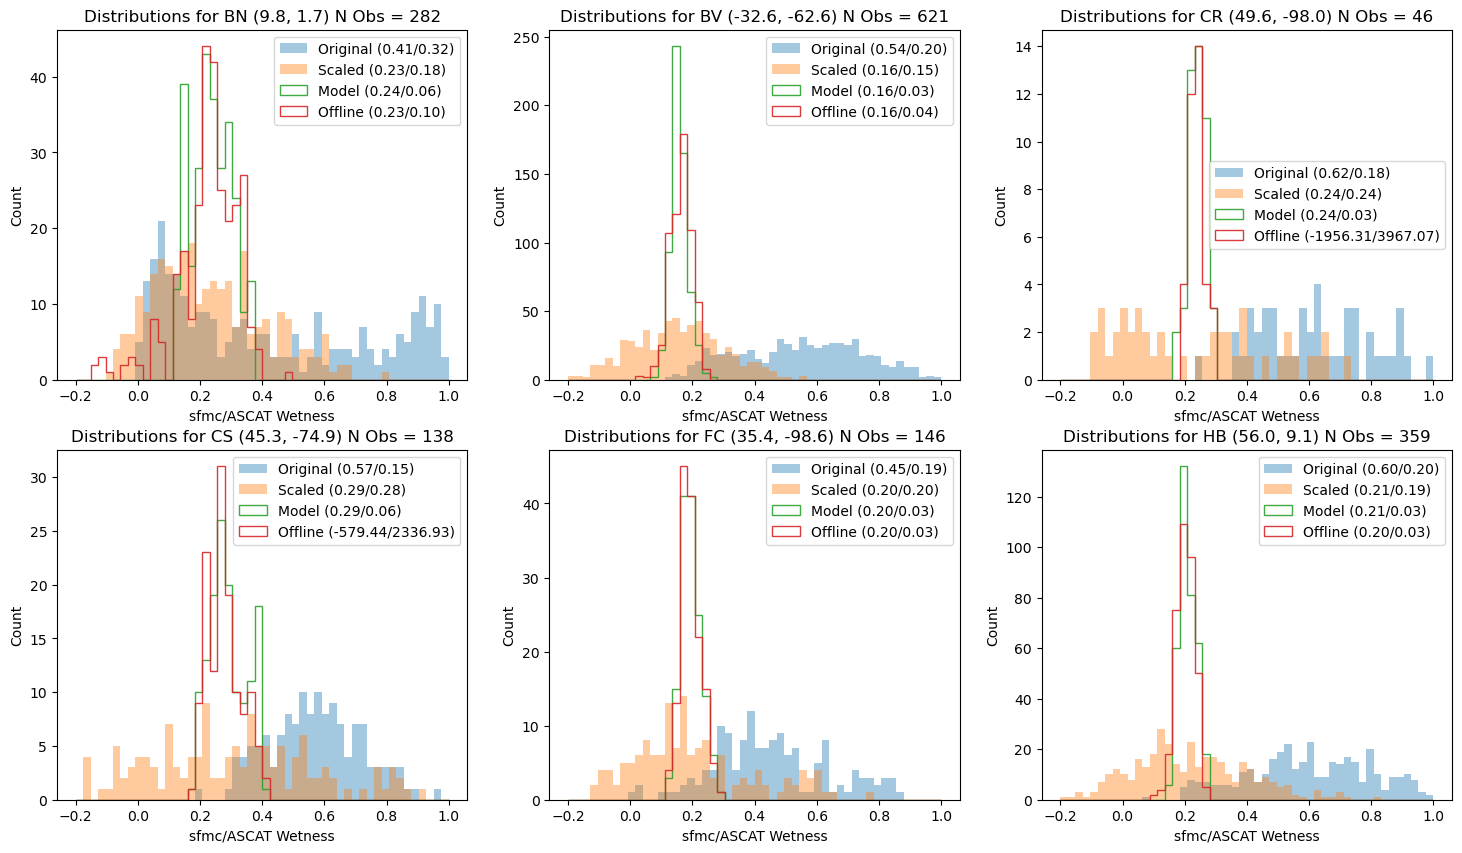

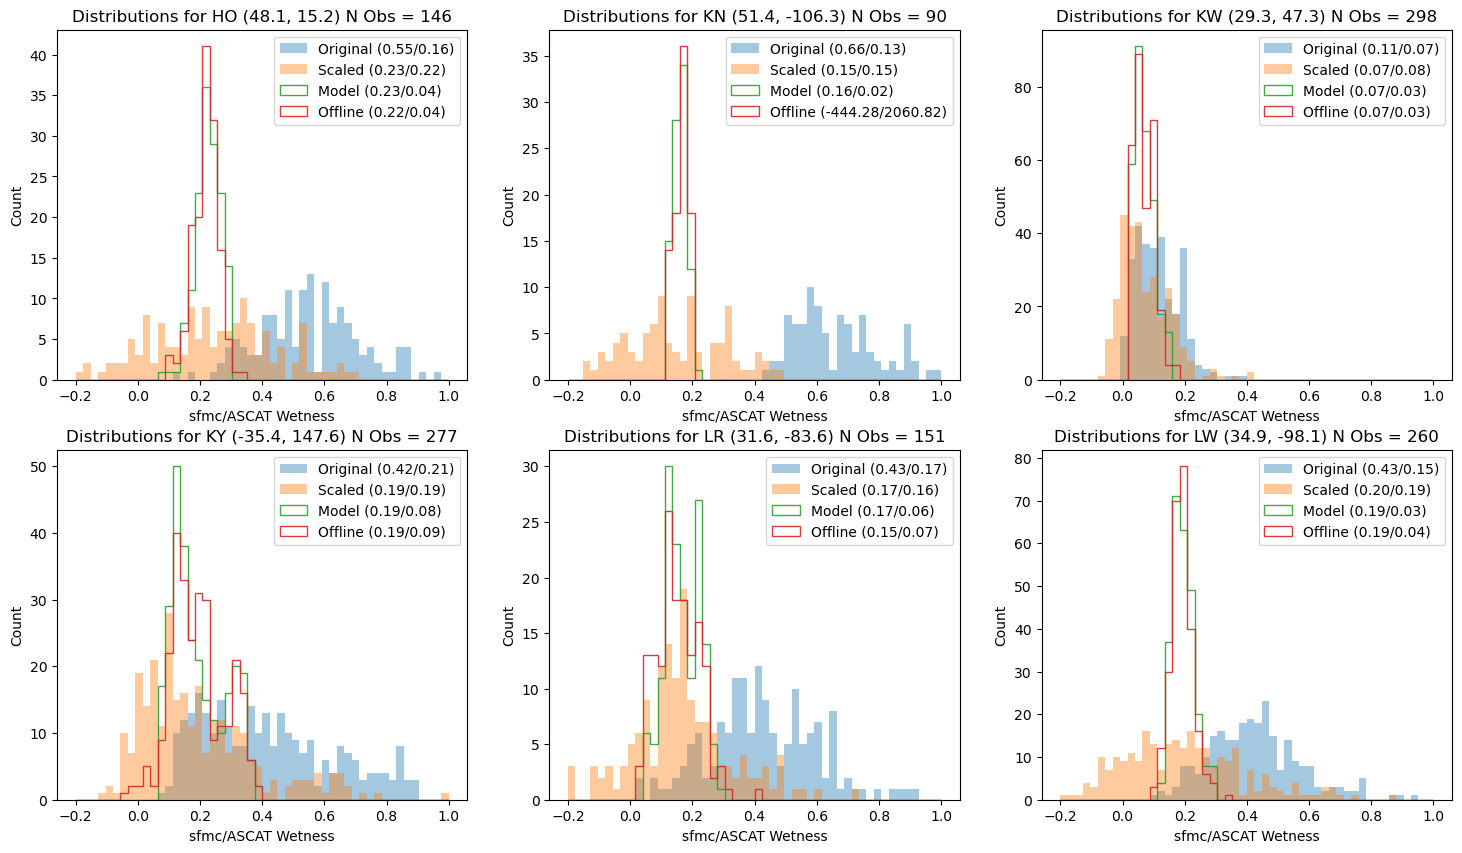

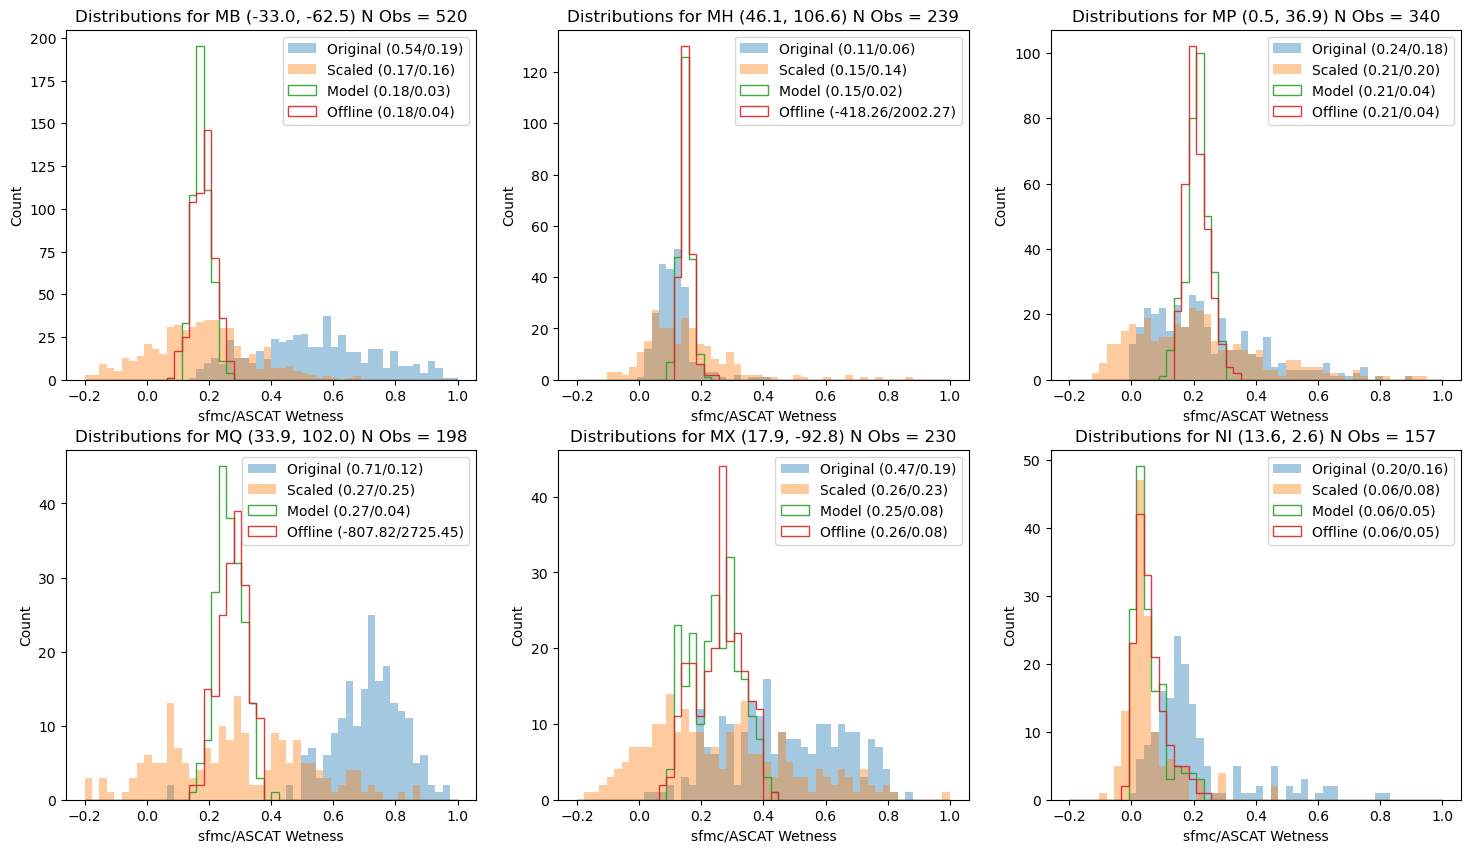

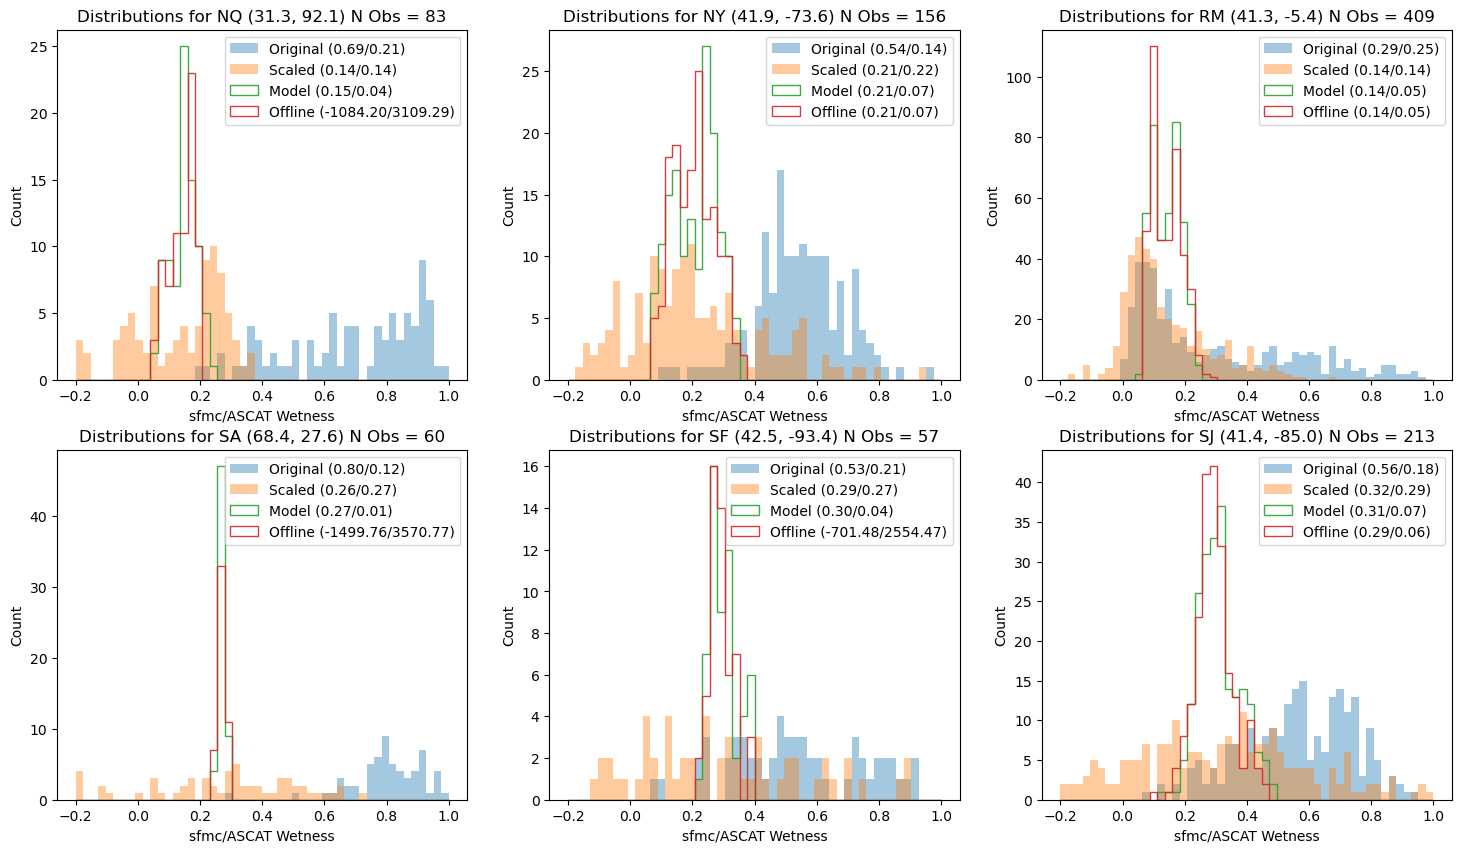

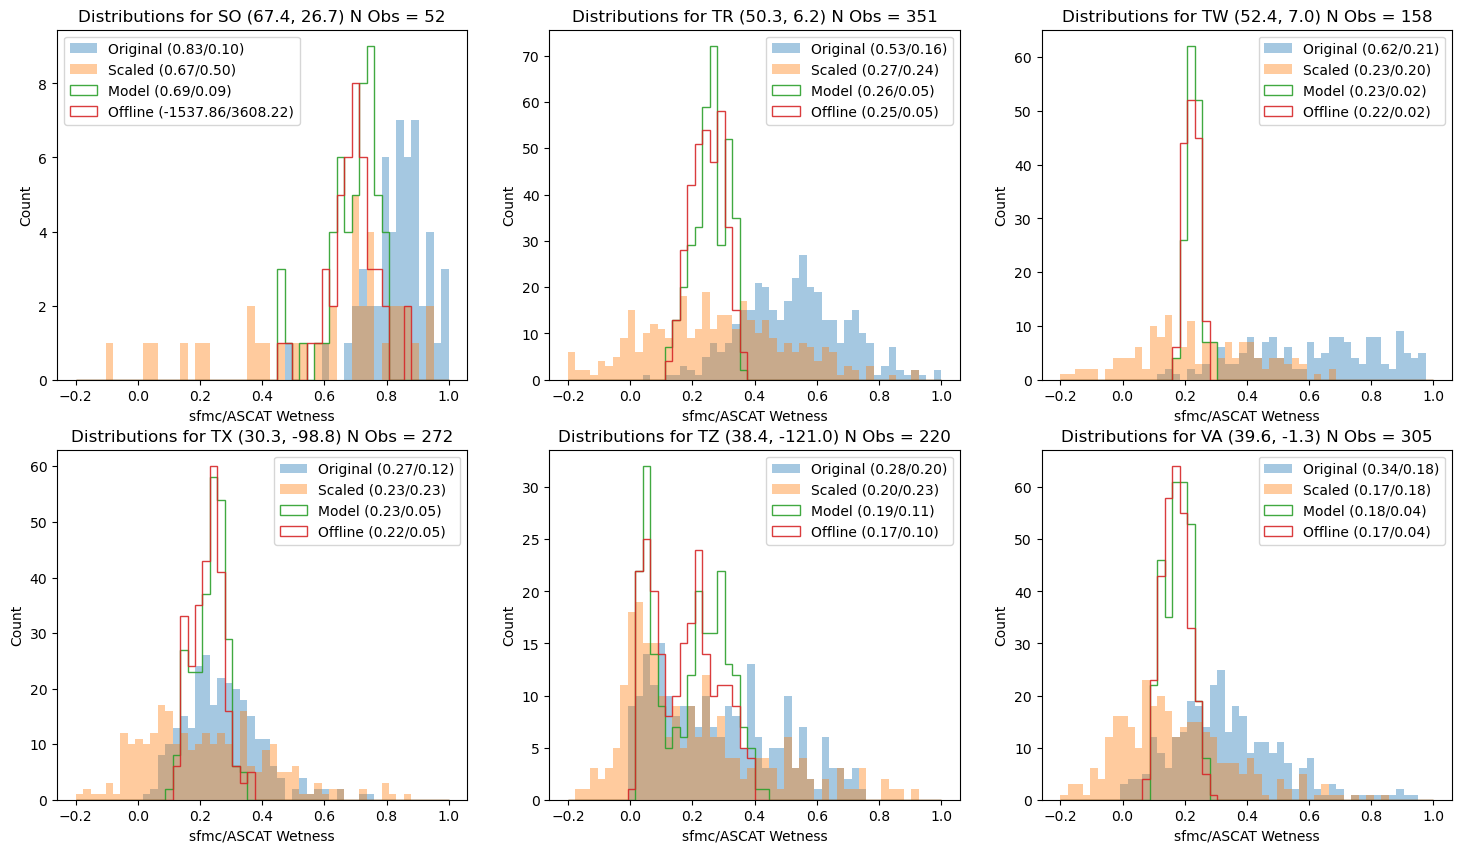

In [31]:
# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Counter for the number of pairs plotted
counter = 0
figure_counter = 0
cnt = -1

# Loop over pairs and plot on subplots
for pair in pair_indices_c:
    cnt += 1

    data1 = obs_obs[pair_indices_c[pair]]
    # Check if data1 is empty
    if len(data1) == 0:
        continue  # Move to the next pair if data1 is empty

    data2 = obs_obs_s[pair_indices_s_c[pair]]
    # data2 = tmp_obs[pair_indices[pair]]
    data3 = obs_fcst[pair_indices_c[pair]]
    data4 = tmp_obs[pair_indices_c[pair]]

    mean_data1 = np.mean(data1)
    mean_data2 = np.mean(data2)
    mean_data3 = np.mean(data3)
    mean_data4 = np.mean(data4)

    std_data1 = np.std(data1)
    std_data2 = np.std(data2)
    std_data3 = np.std(data3)
    std_data4 = np.std(data4)

    # Define bin edges
    combined_data = np.concatenate([data1, data2, data3])
    # bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)
    bin_edges = np.linspace(-0.2, 1.0, 51)

    if counter >= 6:
        # Save the previous figure
        fig_filename = 'core_sites_{}.png'.format(figure_counter)
        fig.savefig(fig_filename)

        # Create new figure if counter reaches 6
        fig, axs = plt.subplots(2, 3, figsize=(18, 10))
        counter = 0

        # Increment the figure counter
        figure_counter += 1

    # Plot on the corresponding subplot
    ax = axs.flat[counter]
    n1, bins, patches = ax.hist(data1, density=False, bins=bin_edges, alpha=0.4, label='Original ({:.2f}/{:.2f})'.format(mean_data1, std_data1))
    n2, bins, patches = ax.hist(data2, density=False, bins=bin_edges, alpha=0.4, label='Scaled ({:.2f}/{:.2f})'.format(mean_data2, std_data2))
    n3, bins, patches = ax.hist(data3, density=False, bins=bin_edges, alpha=0.9, label='Model ({:.2f}/{:.2f})'.format(mean_data3, std_data3), histtype='step')
    n4, bins, patches = ax.hist(data4, density=False, bins=bin_edges, alpha=0.9, label='Offline ({:.2f}/{:.2f})'.format(mean_data4, std_data4), histtype='step')

    # Add labels and title
    ax.set_xlabel('sfmc/ASCAT Wetness')
    ax.set_ylabel('Count')
    ax.set_title('Distributions for {} ({:.1f}, {:.1f}) N Obs = {}'.format(first_lon.index[cnt][:2], first_lat[cnt], first_lon[cnt], len(data1)))

    ax.legend()

    # Increment the counter
    counter += 1

# Save the last figure
fig_filename = 'core_sites_{}.png'.format(figure_counter)
fig.savefig(fig_filename)

# Close the figure
plt.close(fig)


In [ ]:
first_lon[counter]

In [ ]:
# Define indices to loop over
pairs = [(472, 218), (469, 218), (1183, 246), (472, 222)]

pair_indices = {}  # Dictionary to store indices for each pair

# Loop over pairs and create subplots
for pair in pairs:
    max_pair_indices = []
    for idx, (ii, jj) in enumerate(zip(indices_i, indices_j)):
        if ii == pair[0] and jj == pair[1]:
            max_pair_indices.append(idx)
    
    pair_indices[pair] = max_pair_indices  # Save indices for the current pair

    # Rest of the code for plotting goes here


In [ ]:

for pair, indices in pair_indices.items():
    data1 = obs_obs[indices]
    data2 = tmp_obs[indices]
    data3 = obs_fcst[indices]

    # Define bin edges
    combined_data = np.concatenate([data1, data2, data3])
    bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)

    # Create subplot
    fig, ax = plt.subplots()

    n1, bins, patches = ax.hist(data1, density=False, bins=bin_edges, alpha=0.4, label='Original')
    n2, bins, patches = ax.hist(data2, density=False, bins=bin_edges, alpha=0.4, label='Scaled')
    n3, bins, patches = ax.hist(data3, density=False, bins=bin_edges, alpha=0.9, label='Model', histtype='step')

    # Add labels and title
    ax.set_xlabel('ASCAT Wetness')
    ax.set_ylabel('Count')
    ax.set_title('Observations Distribution for ({}, {})'.format(pair[0], pair[1]))
    ax.legend()

    # savename = 'obs_dis_cnt.png'
    # print(" Saving figure as", savename, "\n")
    # plt.savefig(savename, dpi = 400)  

    # Show plot
    plt.show()

    print("Means for ({}, {}): {}, {}, {}\n".format(pair[0], pair[1], np.nanmean(data1), np.nanmean(data2), np.nanmean(data3)))


In [ ]:
# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Counter for the number of pairs plotted
counter = 0

# Loop over pairs and plot on subplots
for pair, indices in pair_indices.items():
    data1 = obs_obs[indices]
    data2 = tmp_obs[indices]
    data3 = obs_fcst[indices]

    # Define bin edges
    combined_data = np.concatenate([data1, data2, data3])
    bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)

    if counter >= 6:
        # Create new figure if counter reaches 6
        fig, axs = plt.subplots(2, 3, figsize=(15, 10))
        counter = 0

    # Plot on the corresponding subplot
    ax = axs.flat[counter]
    n1, bins, patches = ax.hist(data1, density=False, bins=bin_edges, alpha=0.4, label='Original')
    n2, bins, patches = ax.hist(data2, density=False, bins=bin_edges, alpha=0.4, label='Scaled')
    n3, bins, patches = ax.hist(data3, density=False, bins=bin_edges, alpha=0.9, label='Model', histtype='step')

    # Add labels and title
    ax.set_xlabel('ASCAT Wetness')
    ax.set_ylabel('Count')
    ax.set_title('Observations Distribution for ({}, {})'.format(pair[0], pair[1]))
    ax.legend()

    # Increment the counter
    counter += 1

# Adjust subplot layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# Define indices to loop over
pairs = [(472, 218), (469, 218), (1183, 246), (472, 222)]

# Loop over pairs and create subplots
for i, pair in enumerate(pairs):
    max_pair_indices = []
    for idx, (ii, jj) in enumerate(zip(indices_i, indices_j)):
        if ii == pair[0] and jj == pair[1]:
            max_pair_indices.append(idx)
    data1 = obs_obs[max_pair_indices]
    data2 = tmp_obs[max_pair_indices]
    data3 = obs_fcst[max_pair_indices]

    # Define bin edges
    combined_data = np.concatenate([data1, data2, data3])
    bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)

    # Create subplot
    fig, ax = plt.subplots()

    n1, bins, patches = ax.hist(data1, density=False, bins=bin_edges, alpha=0.4, label='Original')
    n2, bins, patches = ax.hist(data2, density=False, bins=bin_edges, alpha=0.4, label='Scaled')
    n3, bins, patches = ax.hist(data3, density=False, bins=bin_edges, alpha=0.9, label='Model', histtype='step')

    # Add labels and title
    ax.set_xlabel('ASCAT Wetness')
    ax.set_ylabel('Count')
    ax.set_title('Observations Distribution for ({}, {})'.format(pair[0], pair[1]))
    ax.legend()

    # savename = 'obs_dis_cnt.png'
    # print(" Saving figure as", savename, "\n")
    # plt.savefig(savename, dpi = 400)  

    # Show plot
    plt.show()

    print("Means for ({}, {}): {}, {}, {}\n".format(pair[0], pair[1], np.nanmean(data1), np.nanmean(data2), np.nanmean(data3)))


In [ ]:
# Define the i, j pairs
ij_pairs = [(472, 218), (469, 218), (1183, 246), (472, 222), (802, 262), (475, 222)]

# Define bin edges
bin_edges = np.linspace(-1, 1, 51)

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Loop over each subplot and plot the data
for idx, ax in enumerate(axs.flat):
    i, j = ij_pairs[idx]
    max_pair_indices = []
    for idx, (ii, jj) in enumerate(zip(indices_i, indices_j)):
        if ii == i and jj == j:
            max_pair_indices.append(idx)
    data1 = obs_obs[max_pair_indices]
    data2 = tmp_obs[max_pair_indices]
    data3 = obs_fcst[max_pair_indices]

    n1, bins, patches = ax.hist(data1, density=False, bins=bin_edges, alpha=0.4, label='Original')
    n2, bins, patches = ax.hist(data2, density=False, bins=bin_edges, alpha=0.4, label='Scaled')
    n3, bins, patches = ax.hist(data3, density=False, bins=bin_edges, alpha=0.9, label='Model', histtype='step')

    # Add labels and title
    ax.set_xlabel('ASCAT Wetness')
    ax.set_ylabel('Count')
    ax.set_title('Observations Distribution - i: {}, j: {}'.format(i, j))
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Define the i, j pairs
ij_pairs = [(472, 218), (469, 218), (1183, 246), (472, 222), (802, 262), (475, 222)]

# Define bin edges
bin_edges = np.linspace(-1, 1, 51)

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Loop over each subplot and plot the data
for idx, ax in enumerate(axs.flat):
    i, j = ij_pairs[idx]
    max_pair_indices = []
    for idx, (ii, jj) in enumerate(zip(indices_i, indices_j)):
        if ii == i and jj == j:
            max_pair_indices.append(idx)
    data1 = obs_obs[max_pair_indices] - obs_fcst[max_pair_indices]
    data2 = tmp_obs[max_pair_indices] - obs_fcst[max_pair_indices]

    n1, bins, patches = ax.hist(data1, density=False, bins=bin_edges, alpha=0.4, label='Original')
    n2, bins, patches = ax.hist(data2, density=False, bins=bin_edges, alpha=0.4, label='Scaled')

    # Add labels and title
    ax.set_xlabel('ASCAT Wetness')
    ax.set_ylabel('Count')
    ax.set_title('OmF - i: {}, j: {}'.format(i, j))
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Specify the file path
csv_file = csv_file = '../test_data/refpix_SM_masterlist.txt'

# Read the CSV file
df = pd.read_csv(csv_file)

# Remove leading/trailing whitespaces from column names
df.columns = df.columns.str.strip()

# Filter the DataFrame to include only rows with 'Alias' of two characters long
df = df[df['Alias'].str.len() == 2]

# Group the DataFrame by 'Alias' and retrieve the first occurrence of each group
first_occurrences = df.groupby('Alias').nth(1)

# Extract the 'Lat' and 'Lon' values for the first occurrences
first_alias = first_occurrences.index
first_lat = first_occurrences['Lat']
first_lon = first_occurrences['Lon']

# Print the first occurrences and their corresponding lat and lon values
for alias, lat, lon in zip(first_occurrences.index, first_lat, first_lon):
    print(f"Alias: {alias}, Lat: {lat}, Lon: {lon}")

# Perform further operations with the data
# ...


In [ ]:
ij_pairs = []  # Initialize the ij_pairs list

for i in range(len(first_lon)):
    this_lon = first_lon[i]   
    this_lat = first_lat[i]  
    i_ind = int((this_lon - ll_lon)/dlon + 1) # Add 1 to ceil equivalent in Fortran
    j_ind = int((this_lat - ll_lat)/dlat + 1) # Add 1 to ceil equivalent in Fortran
    ij_pairs.append((i_ind, j_ind)) 
    

In [ ]:
min(obs_lon), min(obs_lat), min(first_lon), min(first_lat), max(obs_lon), max(obs_lat), max(first_lon), max(first_lat)

In [ ]:
plt.imshow(pair_count, cmap='coolwarm')
plt.colorbar()
plt.show()

# Extract i and j values from ij_pairs
i_values = [pair[0] for pair in ij_pairs]
j_values = [pair[1] for pair in ij_pairs]

# Plot the ij_pairs
plt.scatter(j_values, i_values)
plt.xlabel('i')
plt.ylabel('j')
plt.title('ij_pairs')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your existing code
plt.imshow(pair_count, cmap='coolwarm')
plt.colorbar()

# Extract i and j values from ij_pairs
i_values = [pair[0] for pair in ij_pairs]
j_values = [pair[1] for pair in ij_pairs]

# Plot the ij_pairs on top of the pair_count array
plt.scatter(j_values, i_values, color='red', marker='x')
plt.xlabel('j')
plt.ylabel('i')
plt.title('ij_pairs on pair_count')
plt.grid(True)

# Set the x-axis and y-axis limits
plt.xlim(0, pair_count.shape[1] - 1)  # Adjust the limits as needed
plt.ylim(0, pair_count.shape[0] - 1)  # Adjust the limits as needed

plt.show()


In [ ]:
pair_indices = {}  # Dictionary to store indices for each pair

# Loop over pairs and create subplots
for pair in ij_pairs:
    max_pair_indices = []
    for idx, (ii, jj) in enumerate(zip(indices_i, indices_j)):
        if ii == pair[0] and jj == pair[1]:
            max_pair_indices.append(idx)
    
    pair_indices[pair] = max_pair_indices  # Save indices for the current pair

    # Rest of the code for plotting goes here

In [ ]:
import pickle

# File path to save the dictionary
file_path = 'pair_indices.pkl'

# Save the dictionary to disk
with open(file_path, 'wb') as file:
    pickle.dump(pair_indices, file)


In [ ]:
import pickle

# File path of the saved dictionary
file_path = 'pair_indices.pkl'

# Load the dictionary from disk
with open(file_path, 'rb') as file:
    pair_indices = pickle.load(file)

In [ ]:
# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Counter for the number of pairs plotted
counter = 0

# Loop over pairs and plot on subplots
for pair, indices in pair_indices.items():
    data1 = obs_obs[indices]
    data2 = tmp_obs[indices]
    data3 = obs_fcst[indices]

    # Define bin edges
    combined_data = np.concatenate([data1, data2, data3])
    bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)

    if counter >= 6:
        # Create new figure if counter reaches 6
        fig, axs = plt.subplots(2, 3, figsize=(15, 10))
        counter = 0

    # Plot on the corresponding subplot
    ax = axs.flat[counter]
    n1, bins, patches = ax.hist(data1, density=False, bins=bin_edges, alpha=0.4, label='Original')
    #n2, bins, patches = ax.hist(data2, density=False, bins=bin_edges, alpha=0.4, label='Scaled')
    n3, bins, patches = ax.hist(data3, density=False, bins=bin_edges, alpha=0.9, label='Model', histtype='step')

    # Add labels and title
    ax.set_xlabel('ASCAT Wetness')
    ax.set_ylabel('Count')
    ax.set_title('Observations Distribution for ({}, {})'.format(pair[0], pair[1]))
    ax.legend()

    # Increment the counter
    counter += 1

# Adjust subplot layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
#Calculate i,j
ll_lon = -180.0
ll_lat = -90.0
dlon = 0.25
dlat = 0.25

n_obs = len(obs_obs)
tmp_obs = obs_obs.copy()
tmp_std_obs = obs_obsvar.copy()

i_out = np.zeros(n_obs)
j_out = np.zeros(n_obs)

for i in range(len(obs_obs)):
    this_lon = obs_lon[i]   
    this_lat = obs_lat[i]  
    i_ind = int((this_lon - ll_lon)/dlon + 1) # Add 1 to ceil equivalent in Fortran
    j_ind = int((this_lat - ll_lat)/dlat + 1) # Add 1 to ceil equivalent in Fortran
    
    i_out[i] = i_ind
    j_out[i] = j_ind


In [ ]:
from scipy.spatial.distance import cdist

distances = cdist(np.column_stack((i_out, j_out)), np.column_stack((i_values, j_values)))
min_indices = np.argmin(distances, axis=0)
closest_i_out = i_out[min_indices]
closest_j_out = j_out[min_indices]

In [ ]:
ij_pairs = list(zip(closest_i_out, closest_j_out))

pair_indices = {}  # Dictionary to store indices for each pair

# Loop over pairs and create subplots
for pair in ij_pairs:
    max_pair_indices = []
    for idx, (ii, jj) in enumerate(zip(indices_i, indices_j)):
        if ii == pair[0] and jj == pair[1]:
            max_pair_indices.append(idx)
    
    pair_indices[pair] = max_pair_indices  # Save indices for the current pair

In [ ]:

# Plot the ij_pairs on top of the pair_count array
plt.scatter(i_out, j_out, color='red', marker='.')
plt.xlabel('j')
plt.ylabel('i')
plt.title('ij_pairs on pair_count')
plt.grid(True)

# Extract i and j values from ij_pairs
i_values = [pair[0] for pair in ij_pairs]
j_values = [pair[1] for pair in ij_pairs]

# Plot the ij_pairs on top of the pair_count array
plt.scatter(i_values, j_values, color='blue', marker='x')
plt.xlabel('j')
plt.ylabel('i')
plt.title('ij_pairs on pair_count')
plt.grid(True)

plt.scatter(closest_i_out, closest_j_out, color='green', marker='+')

# Set the x-axis and y-axis limits
plt.xlim(320, 350)  # Adjust the limits as needed
plt.ylim(480, 540)  # Adjust the limits as needed

# Set the x-axis and y-axis ticks with 0.25 spacing
plt.xticks(np.arange(320, 352, 2))
plt.yticks(np.arange(480, 542, 2))

In [ ]:
fig, axs = plt.subplots(figsize=(10, 10))

# Plot the ij_pairs on top of the pair_count array
plt.scatter(obs_lon, obs_lat, color='red', marker='o')
plt.scatter(obs_lon_s, obs_lat_s, color='blue', marker='+')


plt.xlabel('j')
plt.ylabel('i')
plt.title('ij_pairs on pair_count')
plt.grid(True)

# Force the axis to be square
plt.axis('equal')

# Set the x-axis and y-axis limits
plt.xlim(31.5, 32)  # Adjust the limits as needed
plt.ylim(0.5, 1)  # Adjust the limits as needed

# Set the x-axis and y-axis ticks with 0.25 spacing
plt.xticks(np.arange(31.5, 32.25, 0.25))
plt.yticks(np.arange(0.5, 1.25, 0.25))

# Show the plot
plt.show()

In [ ]:
# Define the range of values
lower_bound = 31.75
upper_bound = 32.0

# Create a boolean mask based on the range of values
mask = (obs_lon >= lower_bound) & (obs_lon <= upper_bound)
# Apply the mask to the array to get the subset
obs_lon_subset = obs_lon[mask]

# Create a boolean mask based on the range of values
mask = (obs_lon_s >= lower_bound) & (obs_lon_s <= upper_bound)
# Apply the mask to the array to get the subset
obs_lon_s_subset = obs_lon_s[mask]
#
#  Define the range of values
lower_bound = 0.5
upper_bound = 0.75

# Create a boolean mask based on the range of values
mask = (obs_lat >= lower_bound) & (obs_lat <= upper_bound)
# Apply the mask to the array to get the subset
obs_lat_subset = obs_lon[mask]
# Create a boolean mask based on the range of values
mask = (obs_lat_s >= lower_bound) & (obs_lat_s <= upper_bound)
# Apply the mask to the array to get the subset
obs_lat_s_subset = obs_lon_s[mask]


print(np.sort(obs_lon_subset))
print(np.sort(obs_lon_s_subset))

In [ ]:
# Larger array (m x 3)
larger_array = np.column_stack((obs_lat, obs_lon, pentad2, obs_obs))

# Smaller array (n x 3)
smaller_array = np.column_stack((obs_lat_s, obs_lon_s, pentad2_s, obs_obs_s))

In [ ]:
# Find the values that are in both arrays
arr1 = larger_array[:,0]
arr2 = smaller_array[:,0]

common_vals = np.intersect1d(arr1, arr2)

# Find the indices of those values in arr1 and arr2
common_indices_arr1 = np.where(np.in1d(arr1, common_vals))[0]
common_indices_arr2 = np.where(np.in1d(arr2, common_vals))[0]

print("Common values:", common_vals)
print("Indices in arr1:", common_indices_arr1)
print("Indices in arr2:", common_indices_arr2)

print(len(obs_lon), len(obs_lon_s), len(common_indices_arr1))

In [ ]:

larger_array = larger_array[common_indices_arr1,:]
smaller_array = smaller_array[common_indices_arr2,:]

# Find the values that are in both arrays
arr1 = larger_array[:,1]
arr2 = smaller_array[:,1]

common_vals = np.intersect1d(arr1, arr2)

# Find the indices of those values in arr1 and arr2
common_indices_arr1 = np.where(np.in1d(arr1, common_vals))[0]
common_indices_arr2 = np.where(np.in1d(arr2, common_vals))[0]

print("Common values:", common_vals)
print("Indices in arr1:", common_indices_arr1)
print("Indices in arr2:", common_indices_arr2)

print(len(obs_lon), len(obs_lon_s), len(common_indices_arr1))

In [ ]:
larger_array = larger_array[common_indices_arr1,:]
smaller_array = smaller_array[common_indices_arr2,:]

# Find the values that are in both arrays
arr1 = larger_array[:,3]
arr2 = smaller_array[:,3]

common_vals = np.intersect1d(arr1, arr2)

# Find the indices of those values in arr1 and arr2
common_indices_arr1 = np.where(np.in1d(arr1, common_vals))[0]
common_indices_arr2 = np.where(np.in1d(arr2, common_vals))[0]

print("Common values:", common_vals)
print("Indices in arr1:", common_indices_arr1)
print("Indices in arr2:", common_indices_arr2)

print(len(obs_lon), len(obs_lon_s), len(common_indices_arr1))

In [ ]:
fig, axs = plt.subplots(figsize=(10, 10))

# Plot the ij_pairs on top of the pair_count array
plt.scatter(larger_array[:,1], larger_array[:,0], color='red', marker='o')
plt.scatter(smaller_array[:,1], smaller_array[:,0], color='blue', marker='+')


plt.xlabel('j')
plt.ylabel('i')
plt.title('ij_pairs on pair_count')
plt.grid(True)

# Force the axis to be square
plt.axis('equal')

# Set the x-axis and y-axis limits
plt.xlim(31.5, 32)  # Adjust the limits as needed
plt.ylim(0.5, 1)  # Adjust the limits as needed

# Set the x-axis and y-axis ticks with 0.25 spacing
plt.xticks(np.arange(31.5, 32.25, 0.25))
plt.yticks(np.arange(0.5, 1.25, 0.25))

# Show the plot
plt.show()

In [ ]:
# Initialize an empty list to store the matched indices
matched_indices = []

# Initialize a counter variable
counter = 0

# Iterate over each row in the smaller array
for row_smaller in smaller_array:
    # Find the indices where all three values match across each row in the larger array
    indices = np.where((larger_array == row_smaller).all(axis=1))[0]
    matched_indices.extend(indices)

        # Print a message for every 10,000th row_smaller
    counter += 1
    if counter % 10 == 0:
        print(f"Processing row_smaller {counter}...")

# Convert the list of indices to a NumPy array
matched_indices = np.array(matched_indices)

# Get the matched rows from the larger array
matched_rows = larger_array[matched_indices]


In [ ]:

# Find indices of matched rows
matched_indices = np.where((larger_array[:, None] == smaller_array).all(axis=2))[1]

In [ ]:
# Open the netCDF file using xarray
# ds = xr.open_dataset('/discover/nobackup/amfox/Experiments/ASCAT_3Y_v2/ASCAT_M36/output/SMAP_EASEv2_M36_GLOBAL/stats/z_score_clim_v2/combined_all_pentads_M36_zscore_stats_2015_doy152_2017_doy365_hscale_0.00.nc4')
ds = xr.open_dataset('../test_data/combined_all_pentads_M36_zscore_stats_2015_doy152_2017_doy365_hscale_0.00.nc4')


sclprm_mean_obs_3D = ds['o_mean'].values
sclprm_mean_mod_3D = ds['m_mean'].values
sclprm_std_obs_3D = ds['o_std'].values
sclprm_std_mod_3D = ds['m_std'].values